In [289]:
import seaborn as sns 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os, sys, pathlib
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import YouTubeVideo
import tensorflow as tf
import os
import folium
from folium.plugins import HeatMap,HeatMapWithTime
from IPython.display import IFrame
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import *
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

<h2> Prediction of magnitudes accross globe on 2023 earthquake dataset 

<h3> Introduction

In recent, the rate of natural disasters such as floods and earthquakes has increased massively, to the point where now we are looking at trying to anticipate the next big one, so we can save both human life and property. Only in 2023, roughly 6500 earthquakes took place globally, that we know of. 

On 1st January 2024, Japan was hit by an earthquake of magnitude 7.6 on the Richter scale, in Noto Peninsula, Ishikawa Prefecture. This earthquake caused human life and property loss in its first instance, however it also triggered a tsunami. Additionally, Japan has also been hit with 35 aftershocks after the intial shock. Aftershocks could last for months, and it is believed that they can be bigger than magnitude 6. (Regan, 2024)

With the increased levels of natural disasters, but also increased intensity of them, it is necessary to prepare the society to deal with them more effectively. Anticipatory action is defined as "acting ahead of predicted hazards to prevent or reduce acute humanitarian impacts before they fully unfold", by OCHA. However, this can only take places if scientists and metereologists are learning how to use little data to predict future disasters. 

<h3> Methodology

This report looked at using Long Short Term Memory models to predict earthquake magnitudes, based solely on the magnitudes of earthquakes that took place in 2023 globally. The dataset used was sourced from Kaggle and can be found here: https://www.kaggle.com/datasets/mustafakeser4/earthquakes-2023-global/data. It includes variables useful in identification of earthquakes, such as time, location (latitude and longitude), depth, magnitude, magnitude type. It contains 6521 entries. I have also included an interactive heatmap of the earthquakes that took place in 2023, in order to get a better idea of the locations most targeted. The code was sourced from the Kaggle's notebook on the same dataset, and it can be found here: https://www.kaggle.com/code/gustavovacilotto/earthquake-heatmap/notebook

This report is based on a time series dataset, therefore Long Short Term Memory models are essential for such a report. LSTM is a type of RNN (recurrent neural network) that forgets unnecessary data and stores data that is only essential to the task at hand. It is often used in time series because it incorporates feedback connections, and therefore it can take in sequences of data, not just individual data points. (Saxena, S. (2024a))

In order to be able to able to use LSTM on this dataset, a range of pre-processing actions need to be taken. Firstly, I started with basic EDA and descriptive statisctics, in order to understand the underlying trends of the data, but also to clean it and ensure there are no missing data points. I also dropped the columns that were redundant to this report. Additionally, I have sorted the dataframe by the magnitude type (I chose ml which is the measurement on the Richter scale), converted data types to numerical and removed the duplicates. 

I created the univariate, which was the mag column of the initial dataframe. The LSTM model will only use that univariate. I have also sorted the dataframe by time, so it can be easily understood by the model as a time series. 

There were a few limitations that came with pre-processing of the intitial dataframe. I needed to find the mean of the magnitudes in order to be able to create a baseline - the reasoning behind this is that an earthquake detector would look at a treshold in order to figure out if it is necessary to send an evacuation alert or not and most of the time, that treshold is the mean of multiple factors. The dataframe includes earthquakes from multiple locations, therefore I needed to find the mean for each location, but the data was incomplete in the "place" column. It also has a complex format that cannot be easily formatted with data processing. Therefore, I chose to use the "locationSource" column, that has the abreviations of the states the earthquakes took place in. 

The next step in the deep learning process was to scale the data. According to Brownlee (2019), "when a network is fit on unscaled data that has a range of values (e.g. quantities in the 10s to 100s) it is possible for large inputs to slow down the learning and convergence of your network and in some cases prevent the network from effectively learning your problem". I initially started to use the MinMax method, however after running the first model, it seemed it was more confused and could not find the trend in the data. I believe the issue was that using MinMax was not making the values small enough, especially since "a good rule of thumb is that input variables should be small values, probably in the range of 0-1 or standardized with a zero mean and a standard deviation of one" (Brownlee, 2019). Therefore, I chose to use Z scaling, which represents "how far the data is from the mean" and I created a "mag_baseline" column in the dataframe, so I can easily compare the mag_original column with the original data with the mean baseline for each state in the "location" column.  

After scaling the data, I have split it into train, test and validation sets. Finally, I transformed the data from a 2D shape to a 3D one. According to (Dynamic optimization (no date)) "data is separated into inputs (prior time-series window) and outputs (predicted next value). The inputs are fed into a series of functions to produce the output prediction. The squared difference between the predicted output and the measured output is a typical loss (objective) function for fitting". 

After finishing the pre-processing process, I created a small common baseline model to see how well the predictions fit the pattern, and it seemed to follow the trend in data very well, and the val_mae was fairly low: 0.87. In order to assess model fit, I am looking at the val_mae variable, because it represents the "absolute error refers to the magnitude of difference between the prediction of an observation and the true value of that observation". Since the aim was to predict earthquake magnitude, it seemed necessary to have a form of model assessment that shows how close or far away the predicted values are from the actual data. (Mean absolute error (2022))

The rest of the report is using modular programming in order to automate some of the code that builds models, fits them to the data and plots them. There is one function for each action.The model builder function starts off with some basic hyperparameters of one layer, 64 neurons, ADAM optimizer and TANH activation function. It also has only an LSTM layer and a dense layer. It then offers the option to change any of the above mentioned hyperparameters or add new ones. It is easy to call and adapt the model to either a learning rate, more layers or neurons, dropout layers, etc.

The next function was created to assess the model fit, and it includes epochs, batch size but and it also returns the lowest val_mae for each model, which makes it much easier to compare it to other models. 

The final function is plotting the predictions of each model on top of the actual trend of data, in order to be able to see the curve it takes (or doesn't take). It was interesting to see how the predicted line moved its curve based on the hyperparameters changes. 

The next part of the report looked at several models that used different hyperparameters and calculated the lowest val_mae. At the end of all models, I chose to create facets with all the plots in order to be able to compare them side by side and identify the best model. There were several models that performed well, such as Model 9, Model 12 or Model 15. There are models where one can see the line curve slightly on the data trend however not enough, and there were models where the line was completely straight, which indicated that the model is not at all fit to the data. 

Finally, I wanted to run the best identified model on the new data, so I reshaped the original data and identified the epochs that had the lowest val_mae. I made sure the best running model stopped at the best epoch and then plotted the predictions onto the actual data. 

The final step was to unscale the data and to see how the predictions are doing in comparison with the unscaled original data, without it being normalized. 

-----------------

<h3> Exploratory Data Analysis and Descriptive Statistics 

In [290]:
earthquakes = pd.read_csv("earthquakes.csv", parse_dates=['time', 'updated'])
earthquakes.head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-01 00:49:25.294000+00:00,52.099900,178.521800,82.770,3.10,ml,14.0,139.0,0.87000,0.18,...,2023-03-11 22:51:52.040000+00:00,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us
1,2023-01-01 04:29:13.793000+00:00,53.396500,-166.941700,10.000,3.00,ml,19.0,190.0,0.40000,0.31,...,2023-03-11 22:51:38.040000+00:00,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,reviewed,us,us
2,2023-01-01 04:50:17.639000+00:00,19.281100,-155.428200,37.751,2.80,ml,19.0,127.0,0.06600,0.18,...,2023-03-11 22:51:29.040000+00:00,"10 km NNE of P?hala, Hawaii",earthquake,2.77,5.266,0.060,36.0,reviewed,us,us
3,2023-01-01 05:37:17.016000+00:00,51.461000,-177.479700,33.990,3.00,ml,23.0,208.0,0.33700,0.49,...,2023-03-11 22:51:52.040000+00:00,NaN,earthquake,3.00,10.500,0.115,10.0,reviewed,us,us
4,2023-01-01 06:19:31.410000+00:00,36.595833,-121.200167,8.140,3.14,ml,67.0,66.0,0.02686,0.10,...,2023-04-05 16:40:38.255000+00:00,"9km NW of Pinnacles, CA",earthquake,0.14,0.300,0.146,58.0,reviewed,nc,nc
5,2023-01-01 08:32:16.464000+00:00,52.614500,-166.998800,18.200,3.00,ml,19.0,220.0,0.96900,0.39,...,2023-03-11 22:51:46.040000+00:00,"130 km ESE of Nikolski, Alaska",earthquake,8.00,14.300,0.097,14.0,reviewed,us,us
6,2023-01-01 08:33:24.109000+00:00,52.498500,-166.881800,23.980,2.60,ml,14.0,249.0,1.10600,0.42,...,2023-03-11 22:51:52.040000+00:00,"142 km ESE of Nikolski, Alaska",earthquake,4.20,12.000,0.097,14.0,reviewed,us,us
7,2023-01-01 13:18:25.830000+00:00,52.247000,-168.315600,29.110,3.50,ml,18.0,215.0,0.79700,0.66,...,2023-03-11 22:51:46.040000+00:00,"Fox Islands, Aleutian Islands, Alaska",earthquake,7.27,15.501,0.091,16.0,reviewed,us,us
8,2023-01-01 14:43:21.938000+00:00,51.092900,-176.218400,10.000,3.00,ml,10.0,291.0,0.77900,0.32,...,2023-03-11 22:51:52.040000+00:00,"91 km SSE of Adak, Alaska",earthquake,2.93,2.023,0.148,6.0,reviewed,us,us
9,2023-01-01 14:45:41.283000+00:00,52.287900,-168.300100,19.223,3.40,ml,19.0,214.0,0.76400,0.76,...,2023-03-11 22:51:46.040000+00:00,"81 km SSE of Nikolski, Alaska",earthquake,7.12,7.064,0.091,16.0,reviewed,us,us


In [291]:
earthquakes['month'] = earthquakes['time'].dt.month
earthquakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,month
0,2023-01-01 00:49:25.294000+00:00,52.099900,178.521800,82.770,3.10,ml,14.0,139.0,0.87000,0.18,...,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us,1
1,2023-01-01 04:29:13.793000+00:00,53.396500,-166.941700,10.000,3.00,ml,19.0,190.0,0.40000,0.31,...,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,reviewed,us,us,1
2,2023-01-01 04:50:17.639000+00:00,19.281100,-155.428200,37.751,2.80,ml,19.0,127.0,0.06600,0.18,...,"10 km NNE of P?hala, Hawaii",earthquake,2.77,5.266,0.060,36.0,reviewed,us,us,1
3,2023-01-01 05:37:17.016000+00:00,51.461000,-177.479700,33.990,3.00,ml,23.0,208.0,0.33700,0.49,...,NaN,earthquake,3.00,10.500,0.115,10.0,reviewed,us,us,1
4,2023-01-01 06:19:31.410000+00:00,36.595833,-121.200167,8.140,3.14,ml,67.0,66.0,0.02686,0.10,...,"9km NW of Pinnacles, CA",earthquake,0.14,0.300,0.146,58.0,reviewed,nc,nc,1


In [292]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6520 entries, 0 to 6519
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             6520 non-null   datetime64[ns, UTC]
 1   latitude         6520 non-null   float64            
 2   longitude        6520 non-null   float64            
 3   depth            6520 non-null   float64            
 4   mag              6520 non-null   float64            
 5   magType          6520 non-null   object             
 6   nst              5156 non-null   float64            
 7   gap              5155 non-null   float64            
 8   dmin             4756 non-null   float64            
 9   rms              6520 non-null   float64            
 10  net              6520 non-null   object             
 11  id               6520 non-null   object             
 12  updated          6520 non-null   datetime64[ns, UTC]
 13  place            6

In [293]:
mymap = folium.Map(location=[earthquakes['latitude'].mean(), earthquakes['longitude'].mean()], zoom_start=2)
heat_data = [[point['latitude'], point['longitude']] for index, point in earthquakes.iterrows()]
HeatMap(heat_data).add_to(mymap)
mymap.save("heatmap.html")
IFrame("heatmap.html", width="100%", height=500)

<b> The heatmap sees to show that Central and Eastern Europe have some of the highest and most often earthquakes in the world. This is followed by Japan, and Eastern United States. 

In [294]:
columns_to_drop = ["place", "type", "net", "id", "status", "magSource", "updated", "month"]

earthquakes.drop(columns=columns_to_drop, inplace=True)
earthquakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,locationSource
0,2023-01-01 00:49:25.294000+00:00,52.099900,178.521800,82.770,3.10,ml,14.0,139.0,0.87000,0.18,8.46,21.213,0.097,14.0,us
1,2023-01-01 04:29:13.793000+00:00,53.396500,-166.941700,10.000,3.00,ml,19.0,190.0,0.40000,0.31,1.41,1.999,0.085,18.0,us
2,2023-01-01 04:50:17.639000+00:00,19.281100,-155.428200,37.751,2.80,ml,19.0,127.0,0.06600,0.18,2.77,5.266,0.060,36.0,us
3,2023-01-01 05:37:17.016000+00:00,51.461000,-177.479700,33.990,3.00,ml,23.0,208.0,0.33700,0.49,3.00,10.500,0.115,10.0,us
4,2023-01-01 06:19:31.410000+00:00,36.595833,-121.200167,8.140,3.14,ml,67.0,66.0,0.02686,0.10,0.14,0.300,0.146,58.0,nc


In [295]:
earthquakes_ml = earthquakes[earthquakes['magType'] == 'ml']
earthquakes_ml.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,locationSource
0,2023-01-01 00:49:25.294000+00:00,52.099900,178.521800,82.770,3.10,ml,14.0,139.0,0.87000,0.18,8.46,21.213,0.097,14.0,us
1,2023-01-01 04:29:13.793000+00:00,53.396500,-166.941700,10.000,3.00,ml,19.0,190.0,0.40000,0.31,1.41,1.999,0.085,18.0,us
2,2023-01-01 04:50:17.639000+00:00,19.281100,-155.428200,37.751,2.80,ml,19.0,127.0,0.06600,0.18,2.77,5.266,0.060,36.0,us
3,2023-01-01 05:37:17.016000+00:00,51.461000,-177.479700,33.990,3.00,ml,23.0,208.0,0.33700,0.49,3.00,10.500,0.115,10.0,us
4,2023-01-01 06:19:31.410000+00:00,36.595833,-121.200167,8.140,3.14,ml,67.0,66.0,0.02686,0.10,0.14,0.300,0.146,58.0,nc


In [296]:
earthquakes_ml.sort_index(inplace = True)

In [297]:
earthquakes_ml.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,6520.000000,6520.000000,6520.000000,6520.000000,5156.000000,5155.000000,4756.000000,6520.000000,5029.000000,6520.000000,5132.000000,5135.00000
mean,47.959645,-126.456578,33.234332,2.973043,27.492436,170.043775,0.636314,0.466663,4.179504,3.557533,0.127794,25.64888
std,13.042192,85.539748,40.362974,0.327987,20.747518,78.921317,0.627742,0.244911,3.717353,5.168984,0.179654,29.03459
min,-43.679200,-179.998700,-3.370000,2.600000,0.000000,11.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.00000
25%,42.046925,-166.879750,8.379235,2.700000,15.000000,89.000000,0.129000,0.260000,1.140000,0.600000,0.091000,10.00000
50%,51.898150,-155.300083,16.335500,2.900000,20.000000,195.000000,0.464000,0.460000,3.660000,1.995500,0.105000,16.00000
75%,54.711500,-117.735917,35.000000,3.200000,32.000000,226.000000,0.902000,0.640000,5.800000,3.262000,0.139331,26.00000
max,72.104200,179.991500,338.797000,5.700000,179.000000,350.000000,3.764000,1.880000,43.500000,45.931000,4.490000,256.00000


In [298]:
earthquakes_ml.shape

(6520, 15)

In [299]:
earthquakes_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6520 entries, 0 to 6519
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             6520 non-null   datetime64[ns, UTC]
 1   latitude         6520 non-null   float64            
 2   longitude        6520 non-null   float64            
 3   depth            6520 non-null   float64            
 4   mag              6520 non-null   float64            
 5   magType          6520 non-null   object             
 6   nst              5156 non-null   float64            
 7   gap              5155 non-null   float64            
 8   dmin             4756 non-null   float64            
 9   rms              6520 non-null   float64            
 10  horizontalError  5029 non-null   float64            
 11  depthError       6520 non-null   float64            
 12  magError         5132 non-null   float64            
 13  magNst           5

In [300]:
earthquakes_ml['magType'] = pd.Categorical(earthquakes_ml['magType'])
earthquakes_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6520 entries, 0 to 6519
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             6520 non-null   datetime64[ns, UTC]
 1   latitude         6520 non-null   float64            
 2   longitude        6520 non-null   float64            
 3   depth            6520 non-null   float64            
 4   mag              6520 non-null   float64            
 5   magType          6520 non-null   category           
 6   nst              5156 non-null   float64            
 7   gap              5155 non-null   float64            
 8   dmin             4756 non-null   float64            
 9   rms              6520 non-null   float64            
 10  horizontalError  5029 non-null   float64            
 11  depthError       6520 non-null   float64            
 12  magError         5132 non-null   float64            
 13  magNst           5

In [301]:
earthquakes_ml.drop_duplicates(subset=['time'], inplace=True)
earthquakes_ml.shape

(6520, 15)

In [302]:
missing_percentage = (earthquakes_ml.isna().mean() * 100).round(2)
print(missing_percentage)

time                0.00
latitude            0.00
longitude           0.00
depth               0.00
mag                 0.00
magType             0.00
nst                20.92
gap                20.94
dmin               27.06
rms                 0.00
horizontalError    22.87
depthError          0.00
magError           21.29
magNst             21.24
locationSource      0.00
dtype: float64


In [303]:
columns_to_fill = ["nst", "gap", "dmin", "horizontalError", "magError", "magNst"]
for column in columns_to_fill:
    mean_value = earthquakes_ml[column].mean()
    earthquakes_ml[column].fillna(mean_value, inplace=True)

In [304]:
missing_percentage = (earthquakes_ml.isna().mean() * 100).round(2)
print(missing_percentage)

time               0.0
latitude           0.0
longitude          0.0
depth              0.0
mag                0.0
magType            0.0
nst                0.0
gap                0.0
dmin               0.0
rms                0.0
horizontalError    0.0
depthError         0.0
magError           0.0
magNst             0.0
locationSource     0.0
dtype: float64


In [305]:
earthquakes_ml.set_index("time", inplace = True)

In [306]:
earthquakes_ml

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,locationSource
time,,,,,,,,,,,,,,
2023-01-01 00:49:25.294000+00:00,52.099900,178.521800,82.7700,3.10,ml,14.000000,139.000000,0.870000,0.180,8.460000,21.21300,0.097000,14.00000,us
2023-01-01 04:29:13.793000+00:00,53.396500,-166.941700,10.0000,3.00,ml,19.000000,190.000000,0.400000,0.310,1.410000,1.99900,0.085000,18.00000,us
2023-01-01 04:50:17.639000+00:00,19.281100,-155.428200,37.7510,2.80,ml,19.000000,127.000000,0.066000,0.180,2.770000,5.26600,0.060000,36.00000,us
2023-01-01 05:37:17.016000+00:00,51.461000,-177.479700,33.9900,3.00,ml,23.000000,208.000000,0.337000,0.490,3.000000,10.50000,0.115000,10.00000,us
2023-01-01 06:19:31.410000+00:00,36.595833,-121.200167,8.1400,3.14,ml,67.000000,66.000000,0.026860,0.100,0.140000,0.30000,0.146000,58.00000,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29 04:38:18.099000+00:00,69.131800,-144.717700,0.0000,3.20,ml,27.492436,170.043775,0.636314,0.810,4.179504,2.00000,0.127794,25.64888,ak
2023-12-29 07:10:11.880000+00:00,38.814000,-122.798833,2.0800,3.41,ml,106.000000,27.000000,0.006625,0.060,0.080000,0.12000,0.145000,138.00000,nc
2023-12-29 07:19:06.119000+00:00,31.645800,-104.402200,5.0000,2.60,ml,30.000000,105.000000,0.087000,0.390,1.410000,1.96000,0.051000,51.00000,us


In [307]:
earthquakes_ml.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,locationSource
time,,,,,,,,,,,,,,
2023-01-01 00:49:25.294000+00:00,52.099900,178.521800,82.770,3.10,ml,14.0,139.0,0.87000,0.18,8.46,21.213,0.097,14.0,us
2023-01-01 04:29:13.793000+00:00,53.396500,-166.941700,10.000,3.00,ml,19.0,190.0,0.40000,0.31,1.41,1.999,0.085,18.0,us
2023-01-01 04:50:17.639000+00:00,19.281100,-155.428200,37.751,2.80,ml,19.0,127.0,0.06600,0.18,2.77,5.266,0.060,36.0,us
2023-01-01 05:37:17.016000+00:00,51.461000,-177.479700,33.990,3.00,ml,23.0,208.0,0.33700,0.49,3.00,10.500,0.115,10.0,us
2023-01-01 06:19:31.410000+00:00,36.595833,-121.200167,8.140,3.14,ml,67.0,66.0,0.02686,0.10,0.14,0.300,0.146,58.0,nc


<h4> mag baseline: adding the magnitude baseline as another column to earthquakes_ml in order to be able to create an MAE for both and compare 

In [308]:
common_baseline = earthquakes_ml.groupby("locationSource")["mag"].mean()
common_baseline

locationSource
ak    2.958681
av    2.778571
ci    2.980068
hv    2.973026
mb    3.070000
nc    3.153929
nn    2.929412
ok    2.924762
pr    4.335000
tx    2.939551
us    2.975874
uu    2.897045
uw    2.933158
Name: mag, dtype: float64

In [309]:
common_baseline.index

Index(['ak', 'av', 'ci', 'hv', 'mb', 'nc', 'nn', 'ok', 'pr', 'tx', 'us', 'uu',
       'uw'],
      dtype='object', name='locationSource')

In [310]:
earthquakes_ml_joint = pd.merge(earthquakes_ml,common_baseline, left_on = "locationSource", right_on = common_baseline.index, suffixes = ('_original', '_baseline'))
earthquakes_ml_joint

,latitude,longitude,depth,mag_original,magType,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,locationSource,mag_baseline
0,52.099900,178.521800,82.770,3.10,ml,14.0,139.0,0.870000,0.18,8.46,21.213,0.097000,14.0,us,2.975874
1,53.396500,-166.941700,10.000,3.00,ml,19.0,190.0,0.400000,0.31,1.41,1.999,0.085000,18.0,us,2.975874
2,19.281100,-155.428200,37.751,2.80,ml,19.0,127.0,0.066000,0.18,2.77,5.266,0.060000,36.0,us,2.975874
3,51.461000,-177.479700,33.990,3.00,ml,23.0,208.0,0.337000,0.49,3.00,10.500,0.115000,10.0,us,2.975874
4,52.614500,-166.998800,18.200,3.00,ml,19.0,220.0,0.969000,0.39,8.00,14.300,0.097000,14.0,us,2.975874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6515,60.037333,-153.083333,0.750,2.67,ml,6.0,100.0,0.636314,0.16,0.37,1.360,0.054572,2.0,av,2.778571
6516,53.404167,-163.885162,7.010,2.91,ml,25.0,240.0,0.636314,1.83,16.21,24.270,0.127794,1.0,av,2.778571
6517,52.581167,-174.087167,2.490,2.66,ml,7.0,328.0,0.636314,0.19,1.68,2.370,0.275373,7.0,av,2.778571
6518,54.748833,-164.079333,2.540,2.72,ml,10.0,98.0,0.636314,0.10,0.25,0.580,0.234537,9.0,av,2.778571


<h4> scaling of the univariate (mag_original)

In [311]:
univariate = earthquakes_ml_joint["mag_original"]
univariate.head()

0    3.1
1    3.0
2    2.8
3    3.0
4    3.0
Name: mag_original, dtype: float64

In [312]:
# Scaling input features and target variable
scaler = StandardScaler()

univariate_scaled = scaler.fit_transform(univariate.values.reshape(-1, 1))

In [313]:
univariate_scaled

array([[ 0.38710946],
       [ 0.08219576],
       [-0.52763166],
       ...,
       [-0.95451085],
       [-0.77156262],
       [ 0.29563535]])

In [314]:
univariate_scaled.mean()

1.0358448931594711e-15

In [315]:
univariate_scaled.std()

1.0

<h4> scaling of the mag_baseline in order to be able to compare them

In [316]:
scaler_baseline = StandardScaler()
baseline_scaled = scaler_baseline.fit_transform(earthquakes_ml_joint["mag_baseline"].values.reshape(-1,1))

In [317]:
baseline_scaled

array([[ 0.04677623],
       [ 0.04677623],
       [ 0.04677623],
       ...,
       [-3.21291353],
       [-3.21291353],
       [ 1.60185224]])

In [318]:
baseline_scaled.mean()

4.0191435728270694e-15

In [319]:
baseline_scaled.std()

1.0

<h4> splitting data

train 50% 
test 30% 
validation 20% 

In [320]:
from sklearn.model_selection import train_test_split

train_percentage = 0.7 
val_percentage = 0.1 
test_percentage = 0.2  
 

split_index_train = int(len(univariate_scaled) * train_percentage)
split_index_val = int(len(univariate_scaled) * (train_percentage + val_percentage))
 

train_data = univariate_scaled[:split_index_train]
val_data = univariate_scaled[split_index_train:split_index_val]
test_data = univariate_scaled[split_index_val:]


In [321]:
train_data.shape

(4564, 1)

In [322]:
test_data.shape

(1304, 1)

In [323]:
val_data.shape

(652, 1)

<h4> 3D shaping for train_data - the code for shaping was sourced from Jeremie from Timeseries lab, topic 10 

In [324]:
# Define your sequence length, batch size, and generator
sequence_length_train = 20
batch_size_train = 225

generator_train = TimeseriesGenerator(train_data, train_data, length=sequence_length_train, batch_size=batch_size_train)

In [325]:
inputs_train, targets_train = generator_train[0]

<h4> 3D shaping for test_data

In [326]:
test_data.shape

(1304, 1)

In [327]:
sequence_length_test = 20
batch_size_test = 65

generator_test = TimeseriesGenerator(test_data, test_data, length=sequence_length_test, batch_size=batch_size_test)

In [328]:
inputs_test, targets_test = generator_test[0]

In [329]:
inputs_test.shape

(65, 20, 1)

In [330]:
targets_test.shape

(65, 1)

<h4> 3D shaping for validation

In [331]:
val_data.shape

(652, 1)

In [332]:
sequence_length_val = 20
batch_size_val = 32

generator_val = TimeseriesGenerator(val_data, val_data, length=sequence_length_val, batch_size=batch_size_val)

In [333]:
inputs_val, targets_val = generator_val[0]

In [334]:
inputs_val.shape

(32, 20, 1)

In [335]:
targets_val.shape

(32, 1)

<h4> Common baseline model to see how it adjusts to the 3D shaping

In [336]:
common_baseline = Sequential()
common_baseline.add(LSTM(32, input_shape=(20, 1)))
common_baseline.add(Dense(1))
common_baseline.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [337]:
history = common_baseline.fit(
        inputs_train,
        targets_train,
        validation_data=(inputs_val, targets_val),
        epochs= 25, batch_size= 5, verbose= 1 
        )

Epoch 1/25
45/45 [==============================] - 5s 30ms/step - loss: 0.8890 - mae: 0.7709 - val_loss: 1.7200 - val_mae: 0.8994
Epoch 2/25
45/45 [==============================] - 0s 11ms/step - loss: 0.8825 - mae: 0.7698 - val_loss: 1.7036 - val_mae: 0.8903
Epoch 3/25
45/45 [==============================] - 0s 10ms/step - loss: 0.8817 - mae: 0.7686 - val_loss: 1.7011 - val_mae: 0.8888
Epoch 4/25
45/45 [==============================] - 0s 11ms/step - loss: 0.8820 - mae: 0.7666 - val_loss: 1.7023 - val_mae: 0.8841
Epoch 5/25
45/45 [==============================] - 0s 11ms/step - loss: 0.8818 - mae: 0.7696 - val_loss: 1.7018 - val_mae: 0.8859
Epoch 6/25
45/45 [==============================] - 1s 12ms/step - loss: 0.8790 - mae: 0.7672 - val_loss: 1.6946 - val_mae: 0.8901
Epoch 7/25
45/45 [==============================] - 1s 12ms/step - loss: 0.8788 - mae: 0.7689 - val_loss: 1.6941 - val_mae: 0.8916
Epoch 8/25
45/45 [==============================] - 0s 9ms/step - loss: 0.8814 - ma

In [338]:
common_baseline.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_66 (LSTM)              (None, 32)                4352      
                                                                 
 dense_54 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [339]:
min(history.history['val_mae'])

0.8650288581848145

In [340]:
train_predictions=common_baseline.predict(inputs_train)
print(train_predictions)

8/8 [==============================] - 1s 5ms/step
[[-6.51595592e-02]
 [-1.96280718e-01]
 [-3.35092753e-01]
 [-2.55980417e-02]
 [ 1.64875254e-01]
 [ 3.76008749e-02]
 [-1.18743451e-02]
 [ 3.59782130e-02]
 [-1.20747006e-02]
 [-1.46232257e-02]
 [ 4.11607549e-02]
 [ 1.91040337e-03]
 [-1.28093258e-01]
 [ 1.91088915e-02]
 [-4.04953025e-02]
 [ 4.11672592e-02]
 [-2.42593139e-02]
 [-7.41174892e-02]
 [-8.94445553e-02]
 [-8.49307999e-02]
 [-1.82729438e-02]
 [-5.80527782e-02]
 [ 4.42811623e-02]
 [-7.18288217e-03]
 [-3.90140414e-02]
 [-1.94482207e-02]
 [-7.79621750e-02]
 [-1.73269719e-01]
 [ 2.71931589e-02]
 [ 1.63208723e-01]
 [ 1.52133396e-02]
 [ 7.42753625e-01]
 [ 1.06719351e+00]
 [ 9.63524640e-01]
 [-5.14761448e-01]
 [-5.45045376e-01]
 [ 2.27844492e-01]
 [ 8.00567508e-01]
 [ 7.89992392e-01]
 [-2.71294788e-02]
 [-4.24185902e-01]
 [ 1.69569001e-01]
 [ 4.26528662e-01]
 [-2.64475606e-02]
 [-2.42315277e-01]
 [ 1.07558168e-01]
 [ 3.45728025e-02]
 [-7.80081749e-02]
 [ 1.07362773e-03]
 [ 5.97254336e-02]

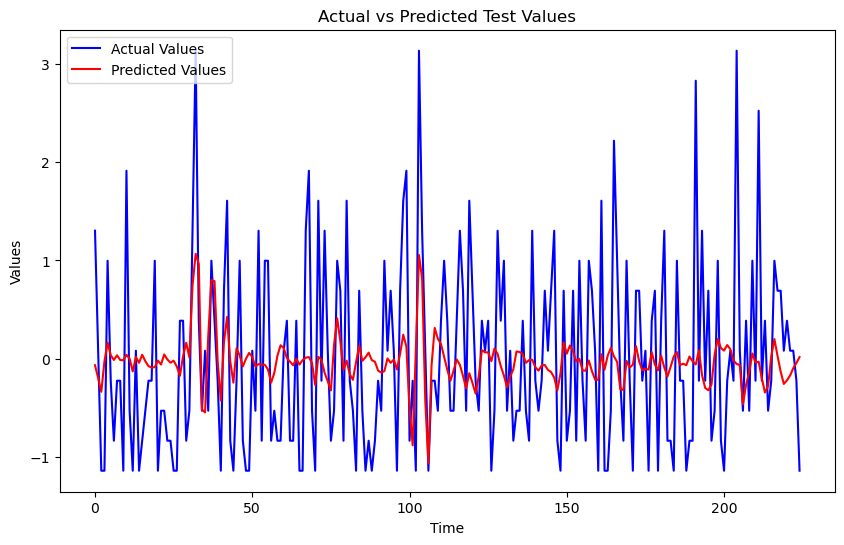

In [341]:
plt.figure(figsize=(10, 6))
plt.plot(targets_train, label='Actual Values', color='blue')
plt.plot(train_predictions, label='Predicted Values', color='red')

plt.title('Actual vs Predicted Test Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

<h4> Modular programming for model building, model fit and model plot

In [342]:
#this creates the function model_builder, only used for one layer of a specific number of neurons - this is the architecture of the model, this has a default learning rate 

def model_builder(layer_one_neurons = 64, layer2_neurons = 0, opt="adam", drop = False, lr=0.001, rate=0.2, act = "tanh"): 
    model_example = Sequential()
    model_example.add(LSTM(layer_one_neurons, activation = act, input_shape=(20, 1), return_sequences= True if layer2_neurons > 0 else False))
    if drop != False: 
        model_example.add(Dropout(rate=rate))
    if layer2_neurons > 0:
        model_example.add(LSTM(layer2_neurons, activation = act,  input_shape=(20, 1)))
        if drop != False: 
            model_example.add(Dropout(rate=rate))
    model_example.add(Dense(1))
    if opt=="adam": 
        opt = Adam(learning_rate=lr)
    if opt=="sgd": 
        opt = SGD(learning_rate=lr)
    if opt=="rmsprop": 
        opt = RMSprop(learning_rate=lr)
    model_example.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])
    return model_example

In [343]:
model_example = model_builder(32, opt = 'adam') #this calls the function, and specifies the number of neurons 

In [344]:
model_example.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_67 (LSTM)              (None, 32)                4352      
                                                                 
 dense_55 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [345]:
#this fits the model
def model_fitting(epochs = 25, batch_size=5, model=model_example):
        history = model.fit(
        inputs_train,
        targets_train,
        validation_data=(inputs_val, targets_val),
        epochs= epochs, batch_size= batch_size, verbose= 1
        )
        return min(history.history['val_mae'])

In [346]:
#this calls the model_fit
model_fitting(epochs = 25, batch_size=5, model=model_example)

Epoch 1/25
45/45 [==============================] - 7s 27ms/step - loss: 0.8958 - mae: 0.7765 - val_loss: 1.7182 - val_mae: 0.8987
Epoch 2/25
45/45 [==============================] - 0s 10ms/step - loss: 0.8843 - mae: 0.7712 - val_loss: 1.7080 - val_mae: 0.8869
Epoch 3/25
45/45 [==============================] - 0s 10ms/step - loss: 0.8833 - mae: 0.7706 - val_loss: 1.7069 - val_mae: 0.8870
Epoch 4/25
45/45 [==============================] - 1s 12ms/step - loss: 0.8835 - mae: 0.7702 - val_loss: 1.7002 - val_mae: 0.8856
Epoch 5/25
45/45 [==============================] - 1s 12ms/step - loss: 0.8807 - mae: 0.7696 - val_loss: 1.7011 - val_mae: 0.8895
Epoch 6/25
45/45 [==============================] - 1s 12ms/step - loss: 0.8809 - mae: 0.7684 - val_loss: 1.6973 - val_mae: 0.8861
Epoch 7/25
45/45 [==============================] - 1s 12ms/step - loss: 0.8779 - mae: 0.7682 - val_loss: 1.6931 - val_mae: 0.8870
Epoch 8/25
45/45 [==============================] - 1s 12ms/step - loss: 0.8775 - m

0.8713561296463013

In [347]:
train_predictions=model_example.predict(inputs_train)

8/8 [==============================] - 1s 6ms/step


In [348]:
train_predictions

array([[ 2.11711489e-02],
       [-1.08922638e-01],
       [-3.11144203e-01],
       [ 1.32752443e-03],
       [ 2.37283513e-01],
       [ 1.53640285e-01],
       [ 3.18384059e-02],
       [ 6.42991886e-02],
       [ 4.12471965e-02],
       [ 2.21246313e-02],
       [ 8.92913193e-02],
       [ 4.16346975e-02],
       [-1.61876649e-01],
       [ 2.07589976e-02],
       [-4.26901877e-03],
       [ 5.62084205e-02],
       [-1.09070074e-03],
       [-3.84976640e-02],
       [-2.65476983e-02],
       [-3.22677707e-03],
       [ 9.23100188e-02],
       [-9.94672813e-03],
       [ 8.28250349e-02],
       [ 8.82733911e-02],
       [ 7.62952939e-02],
       [ 1.00635216e-01],
       [ 6.03680313e-02],
       [-1.65237095e-02],
       [ 1.36542141e-01],
       [ 2.20678240e-01],
       [ 1.35507375e-01],
       [ 3.35523278e-01],
       [ 5.01859426e-01],
       [ 2.37569124e-01],
       [-8.51165414e-01],
       [-5.16120732e-01],
       [ 2.88152039e-01],
       [ 9.56669271e-01],
       [ 8.9

In [349]:
def plot_builder(model=model_example):
    train_predictions=model.predict(inputs_val)
    plt.figure(figsize=(10, 6))
    plt.plot(targets_val, label='Actual Values', color='blue')
    plt.plot(train_predictions, label='Predicted Values', color='red')
    plt.title('Actual vs Predicted Validation Values')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

1/1 [==============================] - 0s 37ms/step


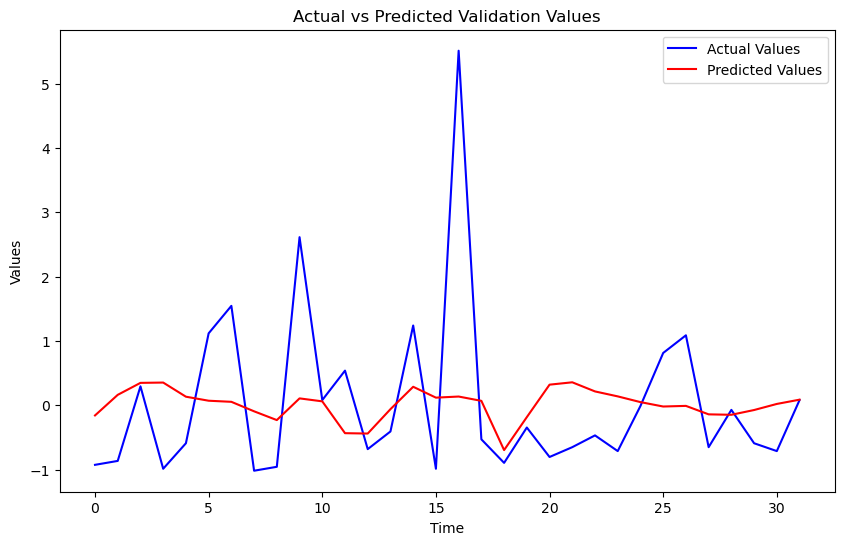

In [350]:
plot_builder(model_example)

<h4> Model 1 - Single layer with 64 neurons 

In [351]:
model_1 = model_builder(64) #this calls the function, and specifies the number of neurons 
model_1.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_68 (LSTM)              (None, 64)                16896     
                                                                 
 dense_56 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [352]:
#this calls the model_fit
model_fitting(epochs = 25, batch_size=5, model=model_1)

Epoch 1/25
45/45 [==============================] - 3s 26ms/step - loss: 0.8890 - mae: 0.7665 - val_loss: 1.6986 - val_mae: 0.8841
Epoch 2/25
45/45 [==============================] - 0s 11ms/step - loss: 0.8822 - mae: 0.7720 - val_loss: 1.6976 - val_mae: 0.8943
Epoch 3/25
45/45 [==============================] - 0s 10ms/step - loss: 0.8829 - mae: 0.7706 - val_loss: 1.6861 - val_mae: 0.8857
Epoch 4/25
45/45 [==============================] - 0s 10ms/step - loss: 0.8794 - mae: 0.7665 - val_loss: 1.6871 - val_mae: 0.8801
Epoch 5/25
45/45 [==============================] - 0s 10ms/step - loss: 0.8762 - mae: 0.7684 - val_loss: 1.6873 - val_mae: 0.8884
Epoch 6/25
45/45 [==============================] - 0s 11ms/step - loss: 0.8778 - mae: 0.7672 - val_loss: 1.6850 - val_mae: 0.8790
Epoch 7/25
45/45 [==============================] - 1s 12ms/step - loss: 0.8745 - mae: 0.7680 - val_loss: 1.6816 - val_mae: 0.8806
Epoch 8/25
45/45 [==============================] - 1s 13ms/step - loss: 0.8720 - m

0.8588274717330933

1/1 [==============================] - 0s 36ms/step


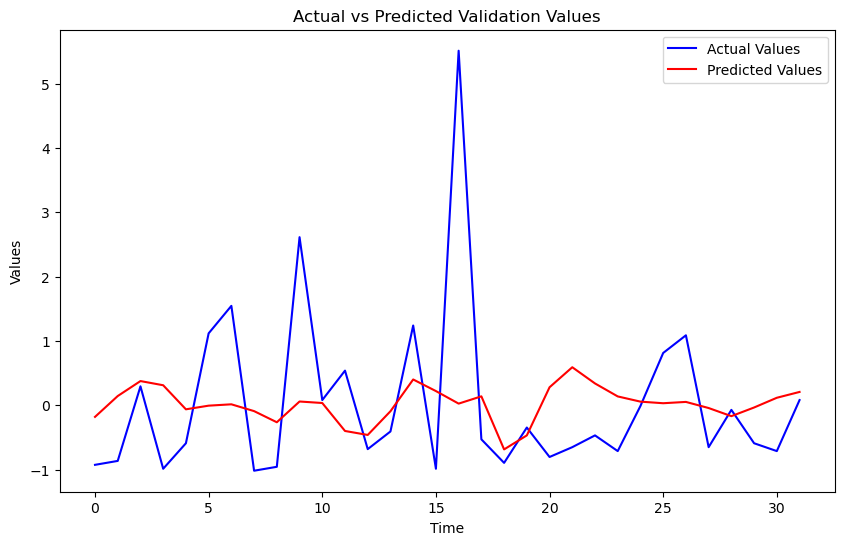

In [353]:
train_predictions_model1=model_1.predict(inputs_val)
plot_builder(model_1)

<h4> Model 2 - Single layer with 132 neurons

In [354]:
model_2 = model_builder(132) #this calls the function, and specifies the number of neurons 
model_2.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_69 (LSTM)              (None, 132)               70752     
                                                                 
 dense_57 (Dense)            (None, 1)                 133       
                                                                 
Total params: 70,885
Trainable params: 70,885
Non-trainable params: 0
_________________________________________________________________


In [355]:
#this calls the model_fit
model_fitting(epochs = 25, batch_size=5, model=model_2)

Epoch 1/25
45/45 [==============================] - 3s 29ms/step - loss: 0.8996 - mae: 0.7739 - val_loss: 1.7128 - val_mae: 0.8861
Epoch 2/25
45/45 [==============================] - 1s 11ms/step - loss: 0.8829 - mae: 0.7721 - val_loss: 1.6906 - val_mae: 0.8820
Epoch 3/25
45/45 [==============================] - 0s 11ms/step - loss: 0.8774 - mae: 0.7689 - val_loss: 1.6920 - val_mae: 0.8683
Epoch 4/25
45/45 [==============================] - 0s 11ms/step - loss: 0.8721 - mae: 0.7671 - val_loss: 1.6873 - val_mae: 0.8689
Epoch 5/25
45/45 [==============================] - 0s 10ms/step - loss: 0.8697 - mae: 0.7630 - val_loss: 1.7089 - val_mae: 0.8684
Epoch 6/25
45/45 [==============================] - 0s 10ms/step - loss: 0.8641 - mae: 0.7667 - val_loss: 1.7465 - val_mae: 0.8860
Epoch 7/25
45/45 [==============================] - 1s 13ms/step - loss: 0.8592 - mae: 0.7610 - val_loss: 1.7616 - val_mae: 0.8886
Epoch 8/25
45/45 [==============================] - 1s 13ms/step - loss: 0.8596 - m

0.860752284526825

1/1 [==============================] - 0s 36ms/step


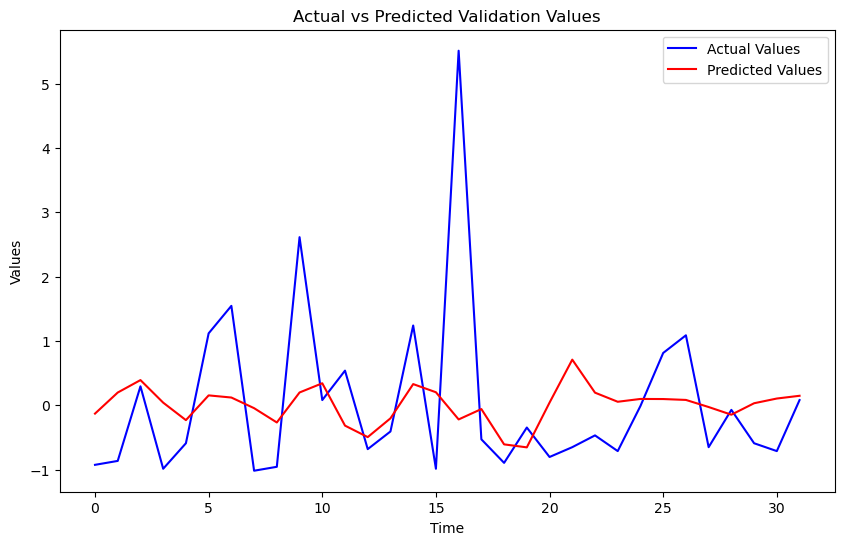

In [356]:
train_predictions_model2=model_2.predict(inputs_val)
plot_builder(model_2)

<h4> Model 3 - 200 neurons

In [357]:
model_3 = model_builder(200) #this calls the function, and specifies the number of neurons 
model_3.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_70 (LSTM)              (None, 200)               161600    
                                                                 
 dense_58 (Dense)            (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [358]:
#this calls the model_fit
model_fitting(epochs = 25, batch_size=5, model=model_3)

Epoch 1/25
45/45 [==============================] - 3s 29ms/step - loss: 0.9018 - mae: 0.7803 - val_loss: 1.6885 - val_mae: 0.8734
Epoch 2/25
45/45 [==============================] - 1s 13ms/step - loss: 0.8857 - mae: 0.7686 - val_loss: 1.6849 - val_mae: 0.8728
Epoch 3/25
45/45 [==============================] - 1s 11ms/step - loss: 0.8744 - mae: 0.7672 - val_loss: 1.7022 - val_mae: 0.8788
Epoch 4/25
45/45 [==============================] - 1s 12ms/step - loss: 0.8749 - mae: 0.7682 - val_loss: 1.7119 - val_mae: 0.8779
Epoch 5/25
45/45 [==============================] - 1s 12ms/step - loss: 0.8665 - mae: 0.7650 - val_loss: 1.7294 - val_mae: 0.8872
Epoch 6/25
45/45 [==============================] - 1s 15ms/step - loss: 0.8603 - mae: 0.7580 - val_loss: 1.7419 - val_mae: 0.8748
Epoch 7/25
45/45 [==============================] - 1s 14ms/step - loss: 0.8584 - mae: 0.7573 - val_loss: 1.7559 - val_mae: 0.8876
Epoch 8/25
45/45 [==============================] - 1s 14ms/step - loss: 0.8598 - m

0.8636564612388611

1/1 [==============================] - 0s 35ms/step


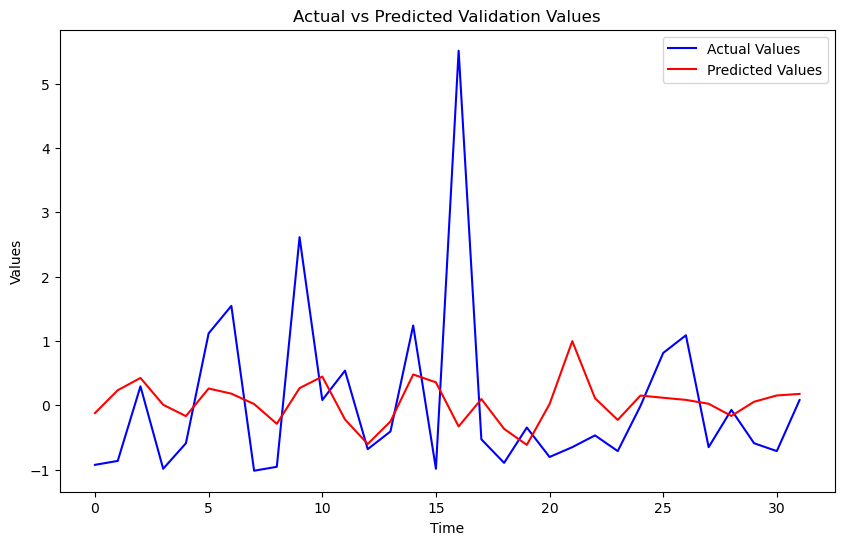

In [359]:
train_predictions_model3=model_3.predict(inputs_val)
plot_builder(model_3)

<h4> Model 4 - two layers of 32 neurons each 

In [360]:
#call model 
model_4 = model_builder(32, 32) 
model_4.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_71 (LSTM)              (None, 20, 32)            4352      
                                                                 
 lstm_72 (LSTM)              (None, 32)                8320      
                                                                 
 dense_59 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [361]:
#model fit
model_fitting(epochs = 25, batch_size=5, model=model_4)

Epoch 1/25
45/45 [==============================] - 6s 45ms/step - loss: 0.8972 - mae: 0.7738 - val_loss: 1.7280 - val_mae: 0.8935
Epoch 2/25
45/45 [==============================] - 1s 15ms/step - loss: 0.8893 - mae: 0.7716 - val_loss: 1.7209 - val_mae: 0.8867
Epoch 3/25
45/45 [==============================] - 1s 16ms/step - loss: 0.8854 - mae: 0.7704 - val_loss: 1.7135 - val_mae: 0.8875
Epoch 4/25
45/45 [==============================] - 1s 15ms/step - loss: 0.8840 - mae: 0.7716 - val_loss: 1.7104 - val_mae: 0.8892
Epoch 5/25
45/45 [==============================] - 1s 13ms/step - loss: 0.8830 - mae: 0.7688 - val_loss: 1.7057 - val_mae: 0.8803
Epoch 6/25
45/45 [==============================] - 1s 14ms/step - loss: 0.8816 - mae: 0.7708 - val_loss: 1.7050 - val_mae: 0.8919
Epoch 7/25
45/45 [==============================] - 1s 15ms/step - loss: 0.8805 - mae: 0.7692 - val_loss: 1.6986 - val_mae: 0.8849
Epoch 8/25
45/45 [==============================] - 1s 15ms/step - loss: 0.8812 - m

0.8504095673561096

1/1 [==============================] - 0s 40ms/step


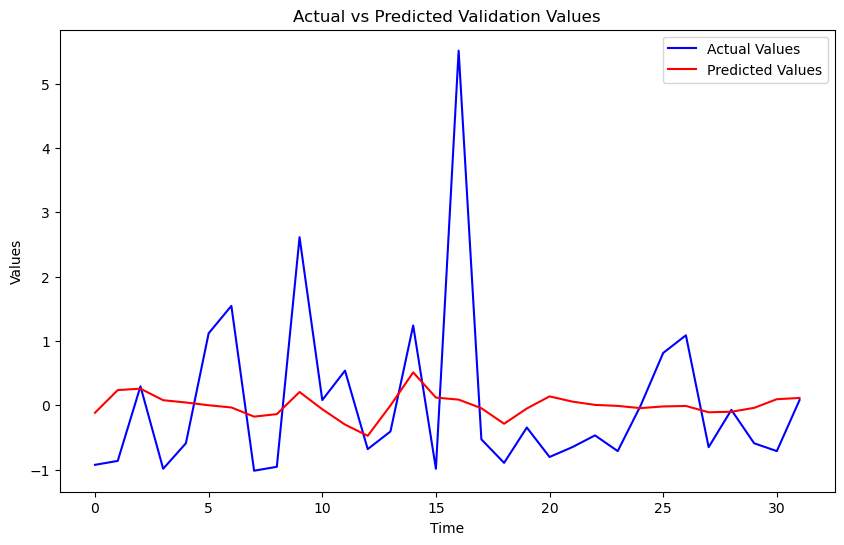

In [362]:
#predictions 
train_predictions_model4=model_4.predict(inputs_val)
plot_builder(model_4)

<h4> Model 5 - 2 layers of 32 neurons each, plus a SGD optimizer instead of ADAM

In [363]:
#call model 
model_5 = model_builder(32, 32, opt="sgd") 
model_5.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_73 (LSTM)              (None, 20, 32)            4352      
                                                                 
 lstm_74 (LSTM)              (None, 32)                8320      
                                                                 
 dense_60 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [364]:
#model fit
model_fitting(epochs = 25, batch_size=5, model=model_5)

Epoch 1/25
45/45 [==============================] - 6s 43ms/step - loss: 0.8847 - mae: 0.7708 - val_loss: 1.7196 - val_mae: 0.8900
Epoch 2/25
45/45 [==============================] - 1s 14ms/step - loss: 0.8844 - mae: 0.7709 - val_loss: 1.7195 - val_mae: 0.8901
Epoch 3/25
45/45 [==============================] - 1s 15ms/step - loss: 0.8844 - mae: 0.7712 - val_loss: 1.7195 - val_mae: 0.8897
Epoch 4/25
45/45 [==============================] - 1s 15ms/step - loss: 0.8844 - mae: 0.7711 - val_loss: 1.7195 - val_mae: 0.8896
Epoch 5/25
45/45 [==============================] - 1s 16ms/step - loss: 0.8843 - mae: 0.7716 - val_loss: 1.7196 - val_mae: 0.8893
Epoch 6/25
45/45 [==============================] - 1s 16ms/step - loss: 0.8847 - mae: 0.7718 - val_loss: 1.7196 - val_mae: 0.8890
Epoch 7/25
45/45 [==============================] - 1s 16ms/step - loss: 0.8838 - mae: 0.7717 - val_loss: 1.7197 - val_mae: 0.8883
Epoch 8/25
45/45 [==============================] - 1s 16ms/step - loss: 0.8841 - m

0.8882200717926025

1/1 [==============================] - 0s 37ms/step


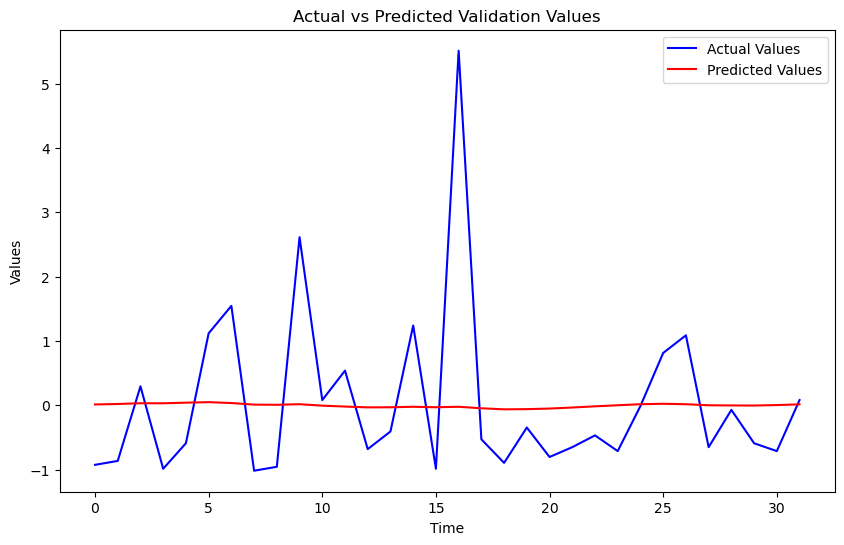

In [365]:
#predictions 
train_predictions_model5=model_5.predict(inputs_val)
plot_builder(model_5)

<h4> Model 6 - an additional learning rate of 0.03

In [366]:
#call model 
model_6 = model_builder(32, 32, opt="sgd", lr=0.03) 
model_6.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_75 (LSTM)              (None, 20, 32)            4352      
                                                                 
 lstm_76 (LSTM)              (None, 32)                8320      
                                                                 
 dense_61 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [367]:
#model fit
model_fitting(epochs = 25, batch_size=5, model=model_6)

Epoch 1/25
45/45 [==============================] - 6s 45ms/step - loss: 0.9326 - mae: 0.7893 - val_loss: 1.7392 - val_mae: 0.8929
Epoch 2/25
45/45 [==============================] - 1s 14ms/step - loss: 0.9190 - mae: 0.7770 - val_loss: 1.7311 - val_mae: 0.9306
Epoch 3/25
45/45 [==============================] - 1s 14ms/step - loss: 0.9040 - mae: 0.7863 - val_loss: 1.7345 - val_mae: 0.8803
Epoch 4/25
45/45 [==============================] - 1s 15ms/step - loss: 0.9027 - mae: 0.7726 - val_loss: 1.7242 - val_mae: 0.8932
Epoch 5/25
45/45 [==============================] - 1s 16ms/step - loss: 0.8952 - mae: 0.7751 - val_loss: 1.7303 - val_mae: 0.8749
Epoch 6/25
45/45 [==============================] - 1s 17ms/step - loss: 0.9144 - mae: 0.7846 - val_loss: 1.7213 - val_mae: 0.8864
Epoch 7/25
45/45 [==============================] - 1s 16ms/step - loss: 0.8983 - mae: 0.7740 - val_loss: 1.7184 - val_mae: 0.9109
Epoch 8/25
45/45 [==============================] - 1s 16ms/step - loss: 0.9037 - m

0.8470901250839233

1/1 [==============================] - 0s 39ms/step


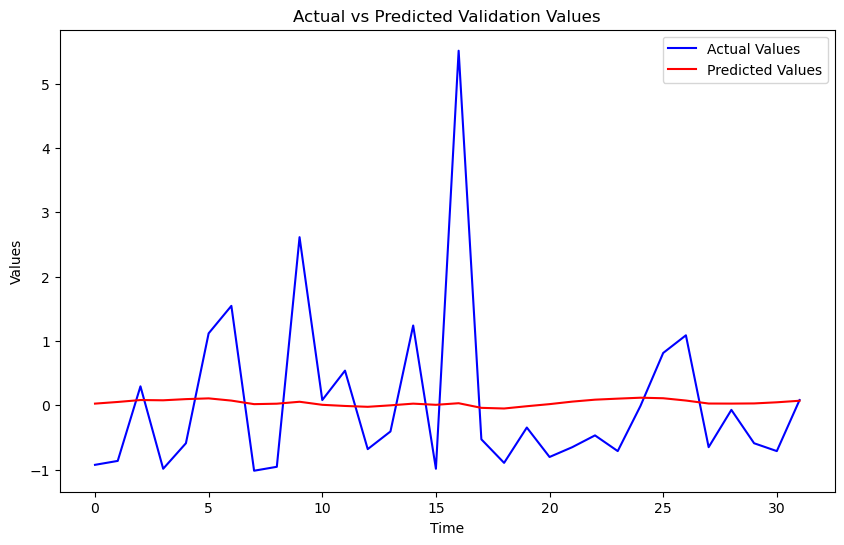

In [368]:
#predictions 
train_predictions_model6=model_6.predict(inputs_val)
plot_builder(model_6)

<h4> Model 7 - two layers of 32 neurons each, a learning rate of 0.03 and an optimizer of RMSPROP

In [369]:
#call model 
model_7 = model_builder(32, 32, opt="rmsprop", lr=0.03) 
model_7.summary()

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_77 (LSTM)              (None, 20, 32)            4352      
                                                                 
 lstm_78 (LSTM)              (None, 32)                8320      
                                                                 
 dense_62 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [370]:
#model fit
model_fitting(epochs = 25, batch_size=5, model=model_7)

Epoch 1/25
45/45 [==============================] - 9s 106ms/step - loss: 0.9491 - mae: 0.7897 - val_loss: 1.7276 - val_mae: 0.9070
Epoch 2/25
45/45 [==============================] - 1s 18ms/step - loss: 0.9019 - mae: 0.7682 - val_loss: 1.7415 - val_mae: 0.9552
Epoch 3/25
45/45 [==============================] - 1s 17ms/step - loss: 0.9233 - mae: 0.7896 - val_loss: 1.7298 - val_mae: 0.8949
Epoch 4/25
45/45 [==============================] - 1s 15ms/step - loss: 0.8943 - mae: 0.7663 - val_loss: 1.7276 - val_mae: 0.9072
Epoch 5/25
45/45 [==============================] - 1s 16ms/step - loss: 0.8910 - mae: 0.7734 - val_loss: 1.7321 - val_mae: 0.8898
Epoch 6/25
45/45 [==============================] - 1s 17ms/step - loss: 0.8956 - mae: 0.7705 - val_loss: 1.7285 - val_mae: 0.9188
Epoch 7/25
45/45 [==============================] - 1s 16ms/step - loss: 0.8907 - mae: 0.7795 - val_loss: 1.7450 - val_mae: 0.8753
Epoch 8/25
45/45 [==============================] - 1s 20ms/step - loss: 0.8961 - 

0.8753458857536316

1/1 [==============================] - 0s 39ms/step


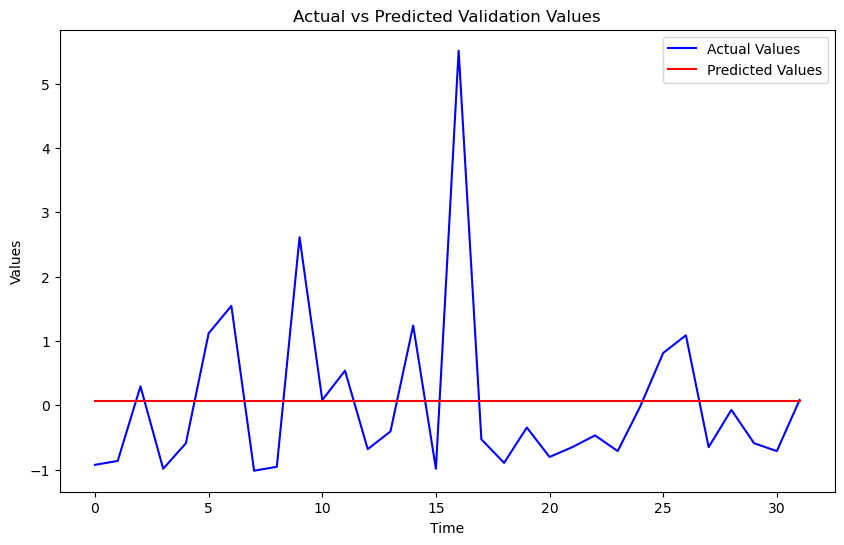

In [371]:
#predictions 
train_predictions_model7=model_7.predict(inputs_val)
plot_builder(model_7)

<h4> Model 8 - changing the activation function of the actual dense layer to relu with only one layer of 64 neurons

In [372]:
#call model 
model_8 = model_builder(64, act = "relu") 
model_8.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_79 (LSTM)              (None, 64)                16896     
                                                                 
 dense_63 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [373]:
#model fit
model_fitting(epochs = 25, batch_size=5, model=model_8)

Epoch 1/25
45/45 [==============================] - 4s 51ms/step - loss: 0.8876 - mae: 0.7673 - val_loss: 1.7114 - val_mae: 0.8894
Epoch 2/25
45/45 [==============================] - 2s 40ms/step - loss: 0.8897 - mae: 0.7798 - val_loss: 1.7101 - val_mae: 0.8919
Epoch 3/25
45/45 [==============================] - 2s 43ms/step - loss: 0.8824 - mae: 0.7689 - val_loss: 1.7064 - val_mae: 0.8935
Epoch 4/25
45/45 [==============================] - 2s 43ms/step - loss: 0.8839 - mae: 0.7694 - val_loss: 1.7031 - val_mae: 0.9015
Epoch 5/25
45/45 [==============================] - 2s 42ms/step - loss: 0.8820 - mae: 0.7719 - val_loss: 1.7045 - val_mae: 0.8981
Epoch 6/25
45/45 [==============================] - 2s 42ms/step - loss: 0.8788 - mae: 0.7706 - val_loss: 1.7028 - val_mae: 0.8939
Epoch 7/25
45/45 [==============================] - 2s 40ms/step - loss: 0.8783 - mae: 0.7678 - val_loss: 1.7024 - val_mae: 0.8885
Epoch 8/25
45/45 [==============================] - 2s 41ms/step - loss: 0.8802 - m

0.8840116262435913

1/1 [==============================] - 0s 45ms/step


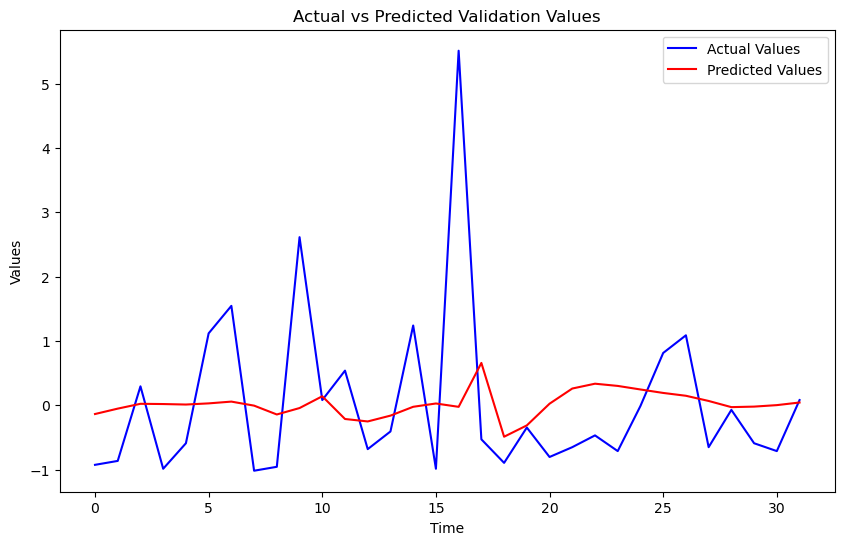

In [374]:
#predictions 
train_predictions_model8=model_8.predict(inputs_val)
plot_builder(model_8)

<h4> Model 9 - regular model with increased batch size 

In [375]:
#call model 
model_9 = model_builder(64) 
model_9.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_80 (LSTM)              (None, 64)                16896     
                                                                 
 dense_64 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [376]:
#model fit
model_fitting(epochs = 25, batch_size=20, model=model_9)

Epoch 1/25
12/12 [==============================] - 4s 83ms/step - loss: 0.8891 - mae: 0.7766 - val_loss: 1.7045 - val_mae: 0.8860
Epoch 2/25
12/12 [==============================] - 0s 18ms/step - loss: 0.8819 - mae: 0.7718 - val_loss: 1.7025 - val_mae: 0.8850
Epoch 3/25
12/12 [==============================] - 0s 18ms/step - loss: 0.8803 - mae: 0.7702 - val_loss: 1.6983 - val_mae: 0.8838
Epoch 4/25
12/12 [==============================] - 0s 16ms/step - loss: 0.8794 - mae: 0.7700 - val_loss: 1.6960 - val_mae: 0.8814
Epoch 5/25
12/12 [==============================] - 0s 15ms/step - loss: 0.8793 - mae: 0.7687 - val_loss: 1.6971 - val_mae: 0.8848
Epoch 6/25
12/12 [==============================] - 0s 15ms/step - loss: 0.8776 - mae: 0.7687 - val_loss: 1.6995 - val_mae: 0.8941
Epoch 7/25
12/12 [==============================] - 0s 16ms/step - loss: 0.8774 - mae: 0.7693 - val_loss: 1.6937 - val_mae: 0.8931
Epoch 8/25
12/12 [==============================] - 0s 15ms/step - loss: 0.8761 - m

0.881356418132782

1/1 [==============================] - 0s 35ms/step


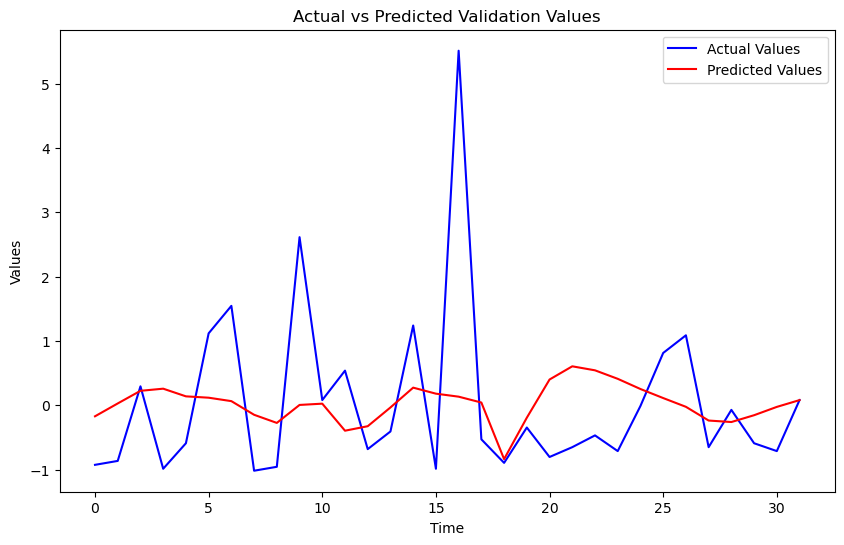

In [377]:
#predictions 
train_predictions_model9=model_9.predict(inputs_val)
plot_builder(model_9)

<h4> Model 10 - larger number of neurons and 2 layers

In [378]:
#call model 
model_10 = model_builder(132, 132) 
model_10.summary()

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_81 (LSTM)              (None, 20, 132)           70752     
                                                                 
 lstm_82 (LSTM)              (None, 132)               139920    
                                                                 
 dense_65 (Dense)            (None, 1)                 133       
                                                                 
Total params: 210,805
Trainable params: 210,805
Non-trainable params: 0
_________________________________________________________________


In [379]:
#model fit
model_fitting(epochs = 25, batch_size=5, model=model_10)

Epoch 1/25
45/45 [==============================] - 6s 46ms/step - loss: 0.8970 - mae: 0.7704 - val_loss: 1.7176 - val_mae: 0.8949
Epoch 2/25
45/45 [==============================] - 1s 17ms/step - loss: 0.8841 - mae: 0.7727 - val_loss: 1.6988 - val_mae: 0.8864
Epoch 3/25
45/45 [==============================] - 1s 16ms/step - loss: 0.8818 - mae: 0.7675 - val_loss: 1.6972 - val_mae: 0.8829
Epoch 4/25
45/45 [==============================] - 1s 16ms/step - loss: 0.8834 - mae: 0.7734 - val_loss: 1.6931 - val_mae: 0.8836
Epoch 5/25
45/45 [==============================] - 1s 18ms/step - loss: 0.8784 - mae: 0.7697 - val_loss: 1.6806 - val_mae: 0.8842
Epoch 6/25
45/45 [==============================] - 1s 18ms/step - loss: 0.8775 - mae: 0.7701 - val_loss: 1.6741 - val_mae: 0.8670
Epoch 7/25
45/45 [==============================] - 1s 18ms/step - loss: 0.8868 - mae: 0.7694 - val_loss: 1.7094 - val_mae: 0.8889
Epoch 8/25
45/45 [==============================] - 1s 18ms/step - loss: 0.8799 - m

0.8394206762313843

1/1 [==============================] - 0s 38ms/step


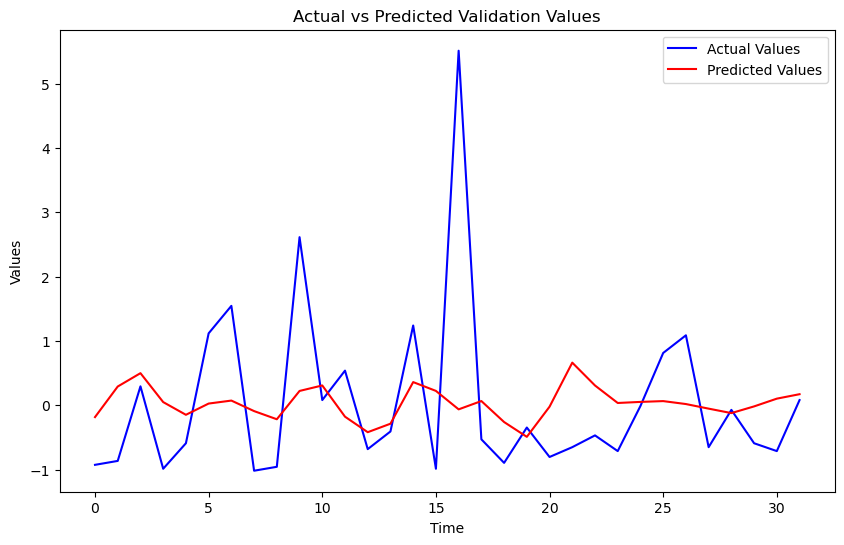

In [380]:
#predictions 
train_predictions_model10=model_10.predict(inputs_val)
plot_builder(model_10)

<h4> Model 11 - lower learning rate than the basic model

In [381]:
#call model 
model_11 = model_builder(132, 132, lr = 0.00050) 
model_11.summary()

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_83 (LSTM)              (None, 20, 132)           70752     
                                                                 
 lstm_84 (LSTM)              (None, 132)               139920    
                                                                 
 dense_66 (Dense)            (None, 1)                 133       
                                                                 
Total params: 210,805
Trainable params: 210,805
Non-trainable params: 0
_________________________________________________________________


In [382]:
#model fit
model_fitting(epochs = 25, batch_size=5, model=model_11)

Epoch 1/25
45/45 [==============================] - 6s 45ms/step - loss: 0.8949 - mae: 0.7709 - val_loss: 1.7150 - val_mae: 0.8903
Epoch 2/25
45/45 [==============================] - 1s 17ms/step - loss: 0.8870 - mae: 0.7737 - val_loss: 1.7029 - val_mae: 0.8866
Epoch 3/25
45/45 [==============================] - 1s 16ms/step - loss: 0.8834 - mae: 0.7703 - val_loss: 1.7044 - val_mae: 0.8843
Epoch 4/25
45/45 [==============================] - 1s 17ms/step - loss: 0.8838 - mae: 0.7718 - val_loss: 1.7014 - val_mae: 0.8863
Epoch 5/25
45/45 [==============================] - 1s 18ms/step - loss: 0.8811 - mae: 0.7664 - val_loss: 1.6982 - val_mae: 0.8752
Epoch 6/25
45/45 [==============================] - 1s 19ms/step - loss: 0.8787 - mae: 0.7669 - val_loss: 1.6916 - val_mae: 0.8781
Epoch 7/25
45/45 [==============================] - 1s 17ms/step - loss: 0.8778 - mae: 0.7690 - val_loss: 1.6859 - val_mae: 0.8790
Epoch 8/25
45/45 [==============================] - 1s 18ms/step - loss: 0.8755 - m

0.8695973753929138

1/1 [==============================] - 0s 40ms/step


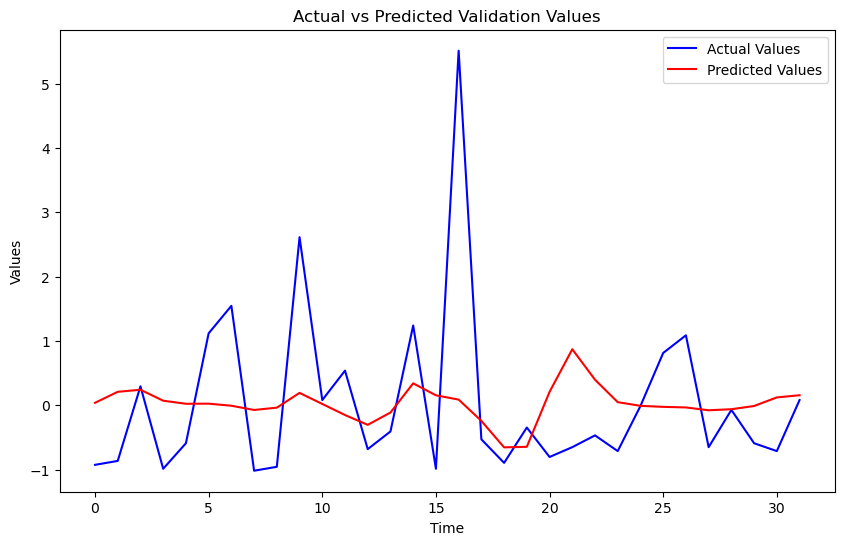

In [383]:
#predictions 
train_predictions_model11=model_11.predict(inputs_val)
plot_builder(model_11)

<h4> Model 12 - higher learning rate 

In [384]:
#call model 
model_12 = model_builder(132, 132, lr = 0.002) 
model_12.summary()

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_85 (LSTM)              (None, 20, 132)           70752     
                                                                 
 lstm_86 (LSTM)              (None, 132)               139920    
                                                                 
 dense_67 (Dense)            (None, 1)                 133       
                                                                 
Total params: 210,805
Trainable params: 210,805
Non-trainable params: 0
_________________________________________________________________


In [385]:
#model fit
model_fitting(epochs = 25, batch_size=5, model=model_12)

Epoch 1/25
45/45 [==============================] - 6s 47ms/step - loss: 0.8970 - mae: 0.7636 - val_loss: 1.7116 - val_mae: 0.8865
Epoch 2/25
45/45 [==============================] - 1s 15ms/step - loss: 0.8860 - mae: 0.7690 - val_loss: 1.6951 - val_mae: 0.8776
Epoch 3/25
45/45 [==============================] - 1s 18ms/step - loss: 0.8844 - mae: 0.7741 - val_loss: 1.6899 - val_mae: 0.8751
Epoch 4/25
45/45 [==============================] - 1s 16ms/step - loss: 0.8805 - mae: 0.7623 - val_loss: 1.6860 - val_mae: 0.8766
Epoch 5/25
45/45 [==============================] - 1s 17ms/step - loss: 0.8713 - mae: 0.7644 - val_loss: 1.7288 - val_mae: 0.8984
Epoch 6/25
45/45 [==============================] - 1s 18ms/step - loss: 0.8760 - mae: 0.7652 - val_loss: 1.7033 - val_mae: 0.8835
Epoch 7/25
45/45 [==============================] - 1s 18ms/step - loss: 0.8696 - mae: 0.7635 - val_loss: 1.6945 - val_mae: 0.8860
Epoch 8/25
45/45 [==============================] - 1s 18ms/step - loss: 0.8648 - m

0.8679385781288147

1/1 [==============================] - 0s 42ms/step


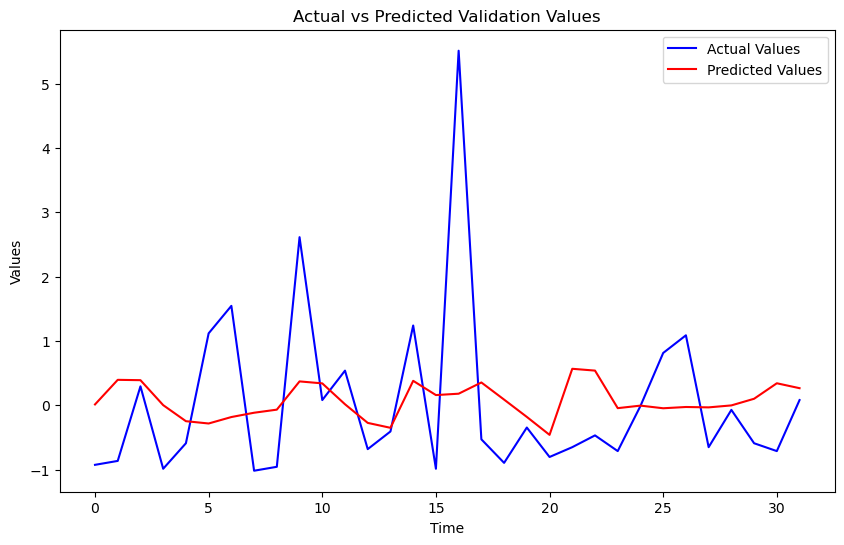

In [386]:
#predictions 
train_predictions_model12=model_12.predict(inputs_val)
plot_builder(model_12)

<h4> Model 13 - even higher learning rate 

In [387]:
#call model 
model_13 = model_builder(132, 132, lr = 0.003) 
model_13.summary()

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_87 (LSTM)              (None, 20, 132)           70752     
                                                                 
 lstm_88 (LSTM)              (None, 132)               139920    
                                                                 
 dense_68 (Dense)            (None, 1)                 133       
                                                                 
Total params: 210,805
Trainable params: 210,805
Non-trainable params: 0
_________________________________________________________________


In [388]:
#model fit
model_fitting(epochs = 25, batch_size=5, model=model_13)

Epoch 1/25
45/45 [==============================] - 6s 46ms/step - loss: 0.8993 - mae: 0.7804 - val_loss: 1.7066 - val_mae: 0.8907
Epoch 2/25
45/45 [==============================] - 1s 16ms/step - loss: 0.8887 - mae: 0.7698 - val_loss: 1.7026 - val_mae: 0.9000
Epoch 3/25
45/45 [==============================] - 1s 16ms/step - loss: 0.8847 - mae: 0.7714 - val_loss: 1.6978 - val_mae: 0.8874
Epoch 4/25
45/45 [==============================] - 1s 16ms/step - loss: 0.8795 - mae: 0.7698 - val_loss: 1.6946 - val_mae: 0.8853
Epoch 5/25
45/45 [==============================] - 1s 17ms/step - loss: 0.8837 - mae: 0.7666 - val_loss: 1.7109 - val_mae: 0.8938
Epoch 6/25
45/45 [==============================] - 1s 19ms/step - loss: 0.8774 - mae: 0.7713 - val_loss: 1.7010 - val_mae: 0.8848
Epoch 7/25
45/45 [==============================] - 1s 18ms/step - loss: 0.8792 - mae: 0.7642 - val_loss: 1.7001 - val_mae: 0.8860
Epoch 8/25
45/45 [==============================] - 1s 19ms/step - loss: 0.8747 - m

0.8734470009803772

1/1 [==============================] - 0s 39ms/step


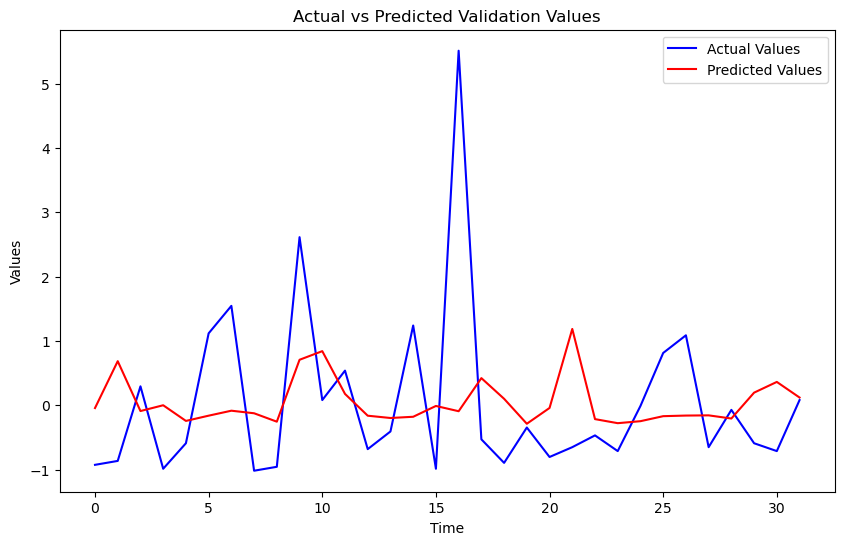

In [389]:
#predictions 
train_predictions_model13=model_13.predict(inputs_val)
plot_builder(model_13)

<h4> Model 14 - even higher learning rate

In [390]:
#call model 
model_14 = model_builder(132, 132, lr = 0.005) 
model_14.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_89 (LSTM)              (None, 20, 132)           70752     
                                                                 
 lstm_90 (LSTM)              (None, 132)               139920    
                                                                 
 dense_69 (Dense)            (None, 1)                 133       
                                                                 
Total params: 210,805
Trainable params: 210,805
Non-trainable params: 0
_________________________________________________________________


In [391]:
#model fit
model_fitting(epochs = 25, batch_size=5, model=model_14)

Epoch 1/25
45/45 [==============================] - 9s 45ms/step - loss: 0.9408 - mae: 0.7834 - val_loss: 1.7207 - val_mae: 0.9149
Epoch 2/25
45/45 [==============================] - 1s 15ms/step - loss: 0.8837 - mae: 0.7670 - val_loss: 1.7174 - val_mae: 0.8858
Epoch 3/25
45/45 [==============================] - 1s 17ms/step - loss: 0.8812 - mae: 0.7712 - val_loss: 1.7084 - val_mae: 0.8819
Epoch 4/25
45/45 [==============================] - 1s 16ms/step - loss: 0.8763 - mae: 0.7711 - val_loss: 1.7205 - val_mae: 0.8695
Epoch 5/25
45/45 [==============================] - 1s 17ms/step - loss: 0.8895 - mae: 0.7624 - val_loss: 1.7258 - val_mae: 0.8830
Epoch 6/25
45/45 [==============================] - 1s 18ms/step - loss: 0.8819 - mae: 0.7686 - val_loss: 1.7110 - val_mae: 0.8906
Epoch 7/25
45/45 [==============================] - 1s 17ms/step - loss: 0.8821 - mae: 0.7729 - val_loss: 1.7159 - val_mae: 0.8842
Epoch 8/25
45/45 [==============================] - 1s 18ms/step - loss: 0.8710 - m

0.8372103571891785

1/1 [==============================] - 0s 41ms/step


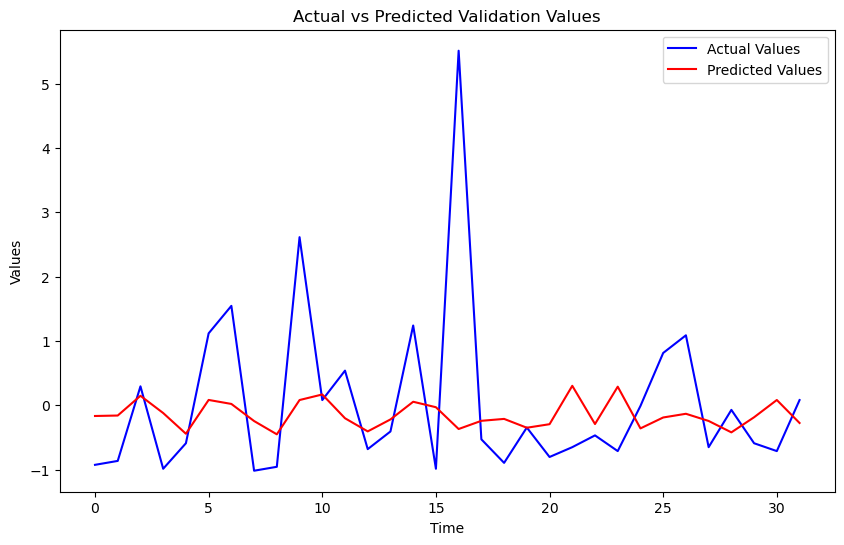

In [392]:
#predictions 
train_predictions_model14=model_14.predict(inputs_val)
plot_builder(model_14)

<h4> New module builder with hidden dense layer and 64 neurons and a relu activation 

In [393]:
#this creates the function model_builder, only used for one layer of a specific number of neurons - this is the architecture of the model, this has a default learning rate 

def model_builder_dense(layer_one_neurons = 64, layer2_neurons = 0, opt="adam", drop = False, lr=0.001, rate=0.2, act = "tanh"): 
    model_example = Sequential()
    model_example.add(LSTM(layer_one_neurons, activation = act, input_shape=(20, 1), return_sequences= True if layer2_neurons > 0 else False))
    if drop != False: 
        model_example.add(Dropout(rate=rate))
    if layer2_neurons > 0:
        model_example.add(LSTM(layer2_neurons, activation = act,  input_shape=(20, 1)))
        if drop != False: 
            model_example.add(Dropout(rate=rate))
    model_example.add(Dense(64, activation = "relu"))
    model_example.add(Dense(1))
    if opt=="adam": 
        opt = Adam(learning_rate=lr)
    if opt=="sgd": 
        opt = SGD(learning_rate=lr)
    if opt=="rmsprop": 
        opt = RMSprop(learning_rate=lr)
    model_example.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])
    return model_example

In [394]:
model_example_dense = model_builder_dense(32) #this calls the function, and specifies the number of neurons 

In [395]:
#this fits the model
def model_fitting_dense(epochs = 25, batch_size=5, model=model_example_dense):
        history = model.fit(
        inputs_train,
        targets_train,
        validation_data=(inputs_val, targets_val),
        epochs= epochs, batch_size= batch_size, verbose= 1
        )
        return min(history.history['val_mae'])

In [396]:
#this calls the model_fit
model_fitting_dense(epochs = 25, batch_size=5, model=model_example_dense)

Epoch 1/25
45/45 [==============================] - 4s 30ms/step - loss: 0.8970 - mae: 0.7664 - val_loss: 1.7005 - val_mae: 0.8834
Epoch 2/25
45/45 [==============================] - 0s 9ms/step - loss: 0.8831 - mae: 0.7692 - val_loss: 1.6834 - val_mae: 0.8800
Epoch 3/25
45/45 [==============================] - 0s 10ms/step - loss: 0.8779 - mae: 0.7643 - val_loss: 1.6830 - val_mae: 0.8869
Epoch 4/25
45/45 [==============================] - 0s 11ms/step - loss: 0.8757 - mae: 0.7658 - val_loss: 1.6816 - val_mae: 0.8823
Epoch 5/25
45/45 [==============================] - 0s 11ms/step - loss: 0.8792 - mae: 0.7662 - val_loss: 1.6737 - val_mae: 0.8762
Epoch 6/25
45/45 [==============================] - 0s 11ms/step - loss: 0.8754 - mae: 0.7668 - val_loss: 1.6823 - val_mae: 0.8844
Epoch 7/25
45/45 [==============================] - 1s 12ms/step - loss: 0.8736 - mae: 0.7673 - val_loss: 1.6766 - val_mae: 0.8955
Epoch 8/25
45/45 [==============================] - 1s 13ms/step - loss: 0.8688 - ma

0.869255542755127

1/1 [==============================] - 0s 34ms/step


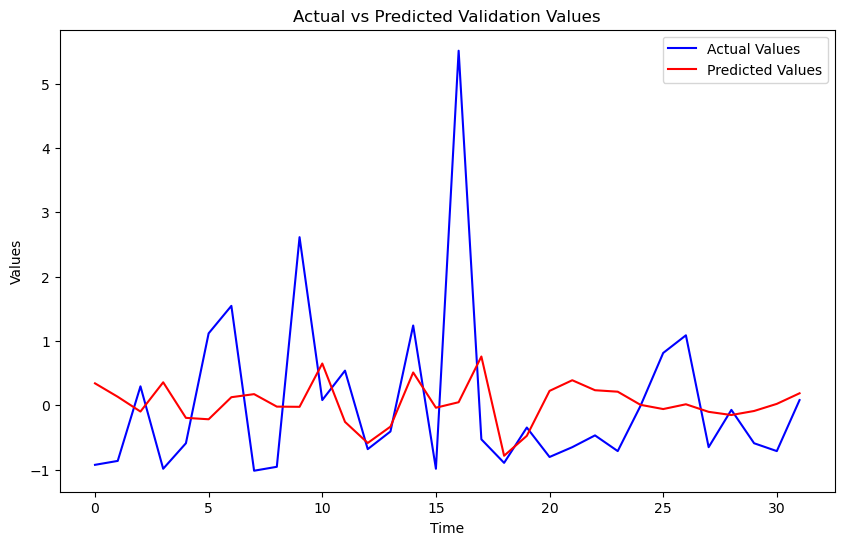

In [397]:
#predictions 
train_predictions_dense=model_example_dense.predict(inputs_val)
plot_builder(model_example_dense)

<h4> Model 15 - increased number of neurons and batch size 

In [398]:
model_15 = model_builder_dense(132) #this calls the function, and specifies the number of neurons 

In [399]:
#this calls the model_fit
model_fitting_dense(epochs = 25, batch_size=10, model=model_15)

Epoch 1/25
23/23 [==============================] - 4s 48ms/step - loss: 0.8971 - mae: 0.7769 - val_loss: 1.7135 - val_mae: 0.8988
Epoch 2/25
23/23 [==============================] - 0s 15ms/step - loss: 0.8791 - mae: 0.7679 - val_loss: 1.6872 - val_mae: 0.8854
Epoch 3/25
23/23 [==============================] - 0s 14ms/step - loss: 0.8782 - mae: 0.7683 - val_loss: 1.6818 - val_mae: 0.8895
Epoch 4/25
23/23 [==============================] - 0s 13ms/step - loss: 0.8772 - mae: 0.7668 - val_loss: 1.6777 - val_mae: 0.8911
Epoch 5/25
23/23 [==============================] - 0s 14ms/step - loss: 0.8706 - mae: 0.7642 - val_loss: 1.6714 - val_mae: 0.8903
Epoch 6/25
23/23 [==============================] - 0s 14ms/step - loss: 0.8690 - mae: 0.7632 - val_loss: 1.6623 - val_mae: 0.8868
Epoch 7/25
23/23 [==============================] - 0s 13ms/step - loss: 0.8645 - mae: 0.7605 - val_loss: 1.6706 - val_mae: 0.8866
Epoch 8/25
23/23 [==============================] - 0s 14ms/step - loss: 0.8615 - m

0.8657320737838745

1/1 [==============================] - 0s 35ms/step


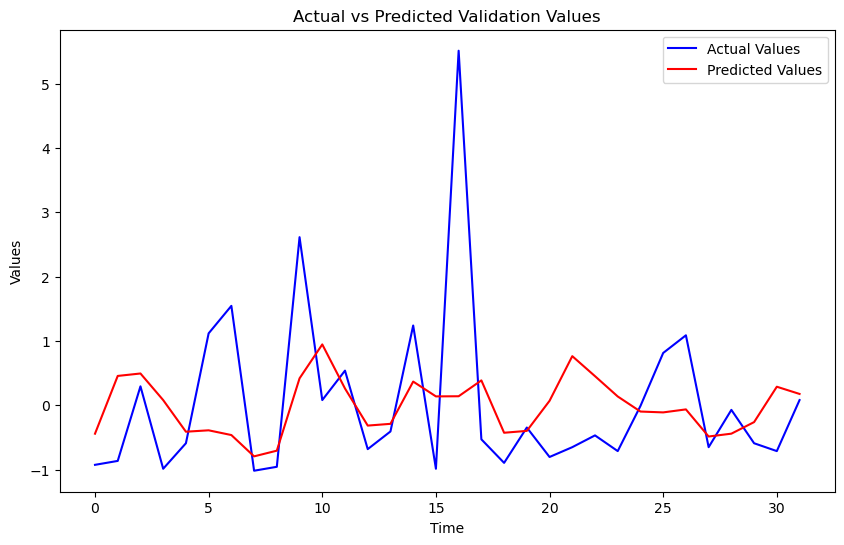

In [400]:
#predictions 
train_predictions_model15=model_15.predict(inputs_val)
plot_builder(model_15)

<h4> Model 16 - 132 neurons, same batch size, higher learning rate

In [401]:
model_16 = model_builder_dense(132, lr = 0.003) #this calls the function, and specifies the number of neurons 

In [402]:
#this calls the model_fit
model_fitting_dense(epochs = 25, batch_size=10, model=model_16)

Epoch 1/25
23/23 [==============================] - 4s 50ms/step - loss: 0.8990 - mae: 0.7739 - val_loss: 1.7005 - val_mae: 0.8949
Epoch 2/25
23/23 [==============================] - 0s 14ms/step - loss: 0.8894 - mae: 0.7757 - val_loss: 1.7006 - val_mae: 0.8716
Epoch 3/25
23/23 [==============================] - 0s 13ms/step - loss: 0.8817 - mae: 0.7609 - val_loss: 1.6923 - val_mae: 0.8849
Epoch 4/25
23/23 [==============================] - 0s 13ms/step - loss: 0.8799 - mae: 0.7731 - val_loss: 1.6929 - val_mae: 0.8834
Epoch 5/25
23/23 [==============================] - 0s 13ms/step - loss: 0.8568 - mae: 0.7539 - val_loss: 1.7542 - val_mae: 0.8936
Epoch 6/25
23/23 [==============================] - 0s 16ms/step - loss: 0.8653 - mae: 0.7599 - val_loss: 1.7410 - val_mae: 0.8967
Epoch 7/25
23/23 [==============================] - 0s 17ms/step - loss: 0.8585 - mae: 0.7487 - val_loss: 1.6859 - val_mae: 0.8711
Epoch 8/25
23/23 [==============================] - 0s 17ms/step - loss: 0.8485 - m

0.8566476106643677

1/1 [==============================] - 0s 34ms/step


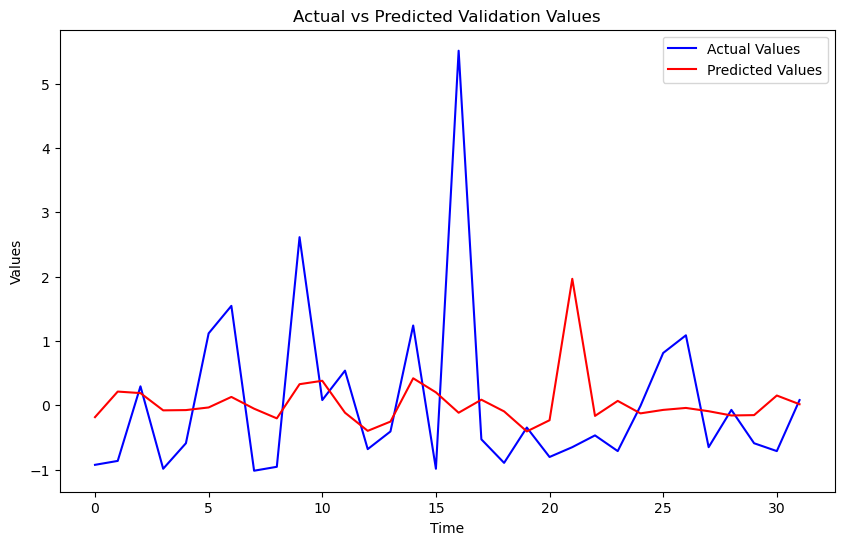

In [403]:
#predictions 
train_predictions_model16=model_16.predict(inputs_val)
plot_builder(model_16)

<h4> Model 17 - increased learning rate

In [404]:
model_17 = model_builder_dense(132, 64, lr = 0.0003) #this calls the function, and specifies the number of neurons 

In [405]:
#this calls the model_fit
model_fitting_dense(epochs = 25, batch_size=10, model=model_17)

Epoch 1/25
23/23 [==============================] - 7s 76ms/step - loss: 0.8884 - mae: 0.7742 - val_loss: 1.7279 - val_mae: 0.8977
Epoch 2/25
23/23 [==============================] - 0s 18ms/step - loss: 0.8836 - mae: 0.7711 - val_loss: 1.7254 - val_mae: 0.8967
Epoch 3/25
23/23 [==============================] - 0s 19ms/step - loss: 0.8826 - mae: 0.7703 - val_loss: 1.7256 - val_mae: 0.8969
Epoch 4/25
23/23 [==============================] - 0s 19ms/step - loss: 0.8834 - mae: 0.7718 - val_loss: 1.7279 - val_mae: 0.9036
Epoch 5/25
23/23 [==============================] - 0s 20ms/step - loss: 0.8816 - mae: 0.7710 - val_loss: 1.7222 - val_mae: 0.8945
Epoch 6/25
23/23 [==============================] - 0s 19ms/step - loss: 0.8797 - mae: 0.7699 - val_loss: 1.7203 - val_mae: 0.8920
Epoch 7/25
23/23 [==============================] - 0s 19ms/step - loss: 0.8804 - mae: 0.7711 - val_loss: 1.7199 - val_mae: 0.8954
Epoch 8/25
23/23 [==============================] - 1s 23ms/step - loss: 0.8787 - m

0.866679310798645

1/1 [==============================] - 0s 35ms/step


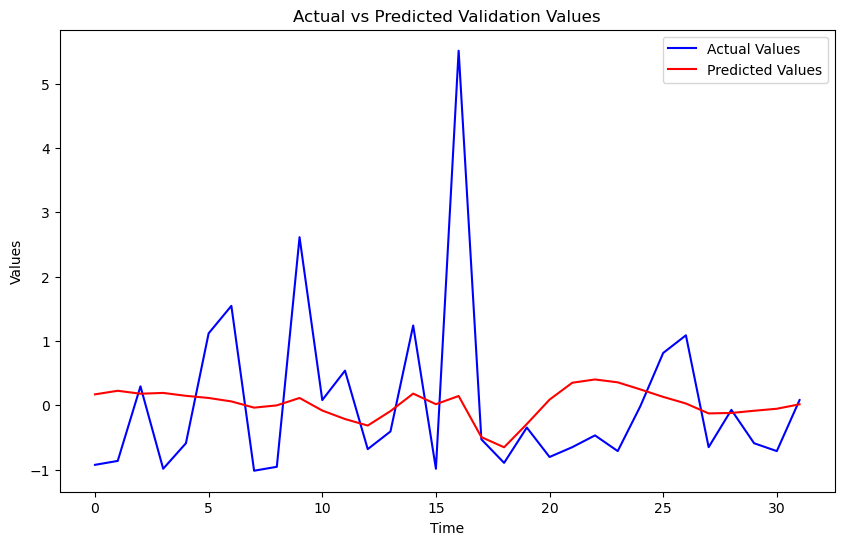

In [406]:
#predictions 
train_predictions_model17=model_17.predict(inputs_val)
plot_builder(model_17)

<h4> Model 18 - 2 layers of 64 neurons each, a 0.003 learning and a dropout layer

In [407]:
model_18 = model_builder_dense(64, 64, lr = 0.003,drop=True) #this calls the function, and specifies the number of neurons 

In [408]:
#this calls the model_fit
model_fitting_dense(epochs = 25, batch_size=10, model=model_18)

Epoch 1/25
23/23 [==============================] - 7s 79ms/step - loss: 0.9003 - mae: 0.7754 - val_loss: 1.7347 - val_mae: 0.9133
Epoch 2/25
23/23 [==============================] - 0s 20ms/step - loss: 0.8971 - mae: 0.7750 - val_loss: 1.7313 - val_mae: 0.9077
Epoch 3/25
23/23 [==============================] - 0s 19ms/step - loss: 0.8896 - mae: 0.7696 - val_loss: 1.7209 - val_mae: 0.9172
Epoch 4/25
23/23 [==============================] - 0s 19ms/step - loss: 0.8884 - mae: 0.7759 - val_loss: 1.7212 - val_mae: 0.8836
Epoch 5/25
23/23 [==============================] - 0s 20ms/step - loss: 0.8868 - mae: 0.7645 - val_loss: 1.7149 - val_mae: 0.8835
Epoch 6/25
23/23 [==============================] - 0s 19ms/step - loss: 0.8969 - mae: 0.7770 - val_loss: 1.7291 - val_mae: 0.8934
Epoch 7/25
23/23 [==============================] - 0s 19ms/step - loss: 0.9001 - mae: 0.7808 - val_loss: 1.7186 - val_mae: 0.8511
Epoch 8/25
23/23 [==============================] - 1s 24ms/step - loss: 0.8905 - m

0.8394635915756226

1/1 [==============================] - 0s 38ms/step


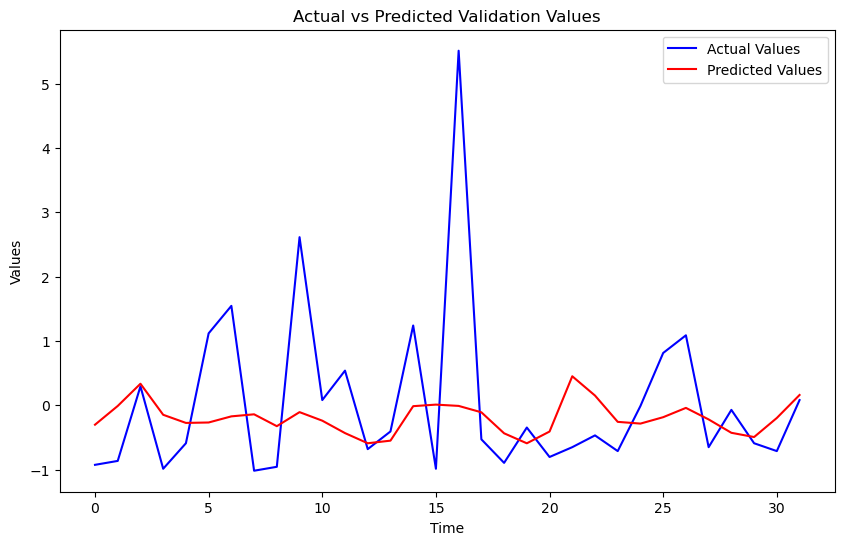

In [409]:
#predictions 
train_predictions_model18=model_18.predict(inputs_val)
plot_builder(model_18)

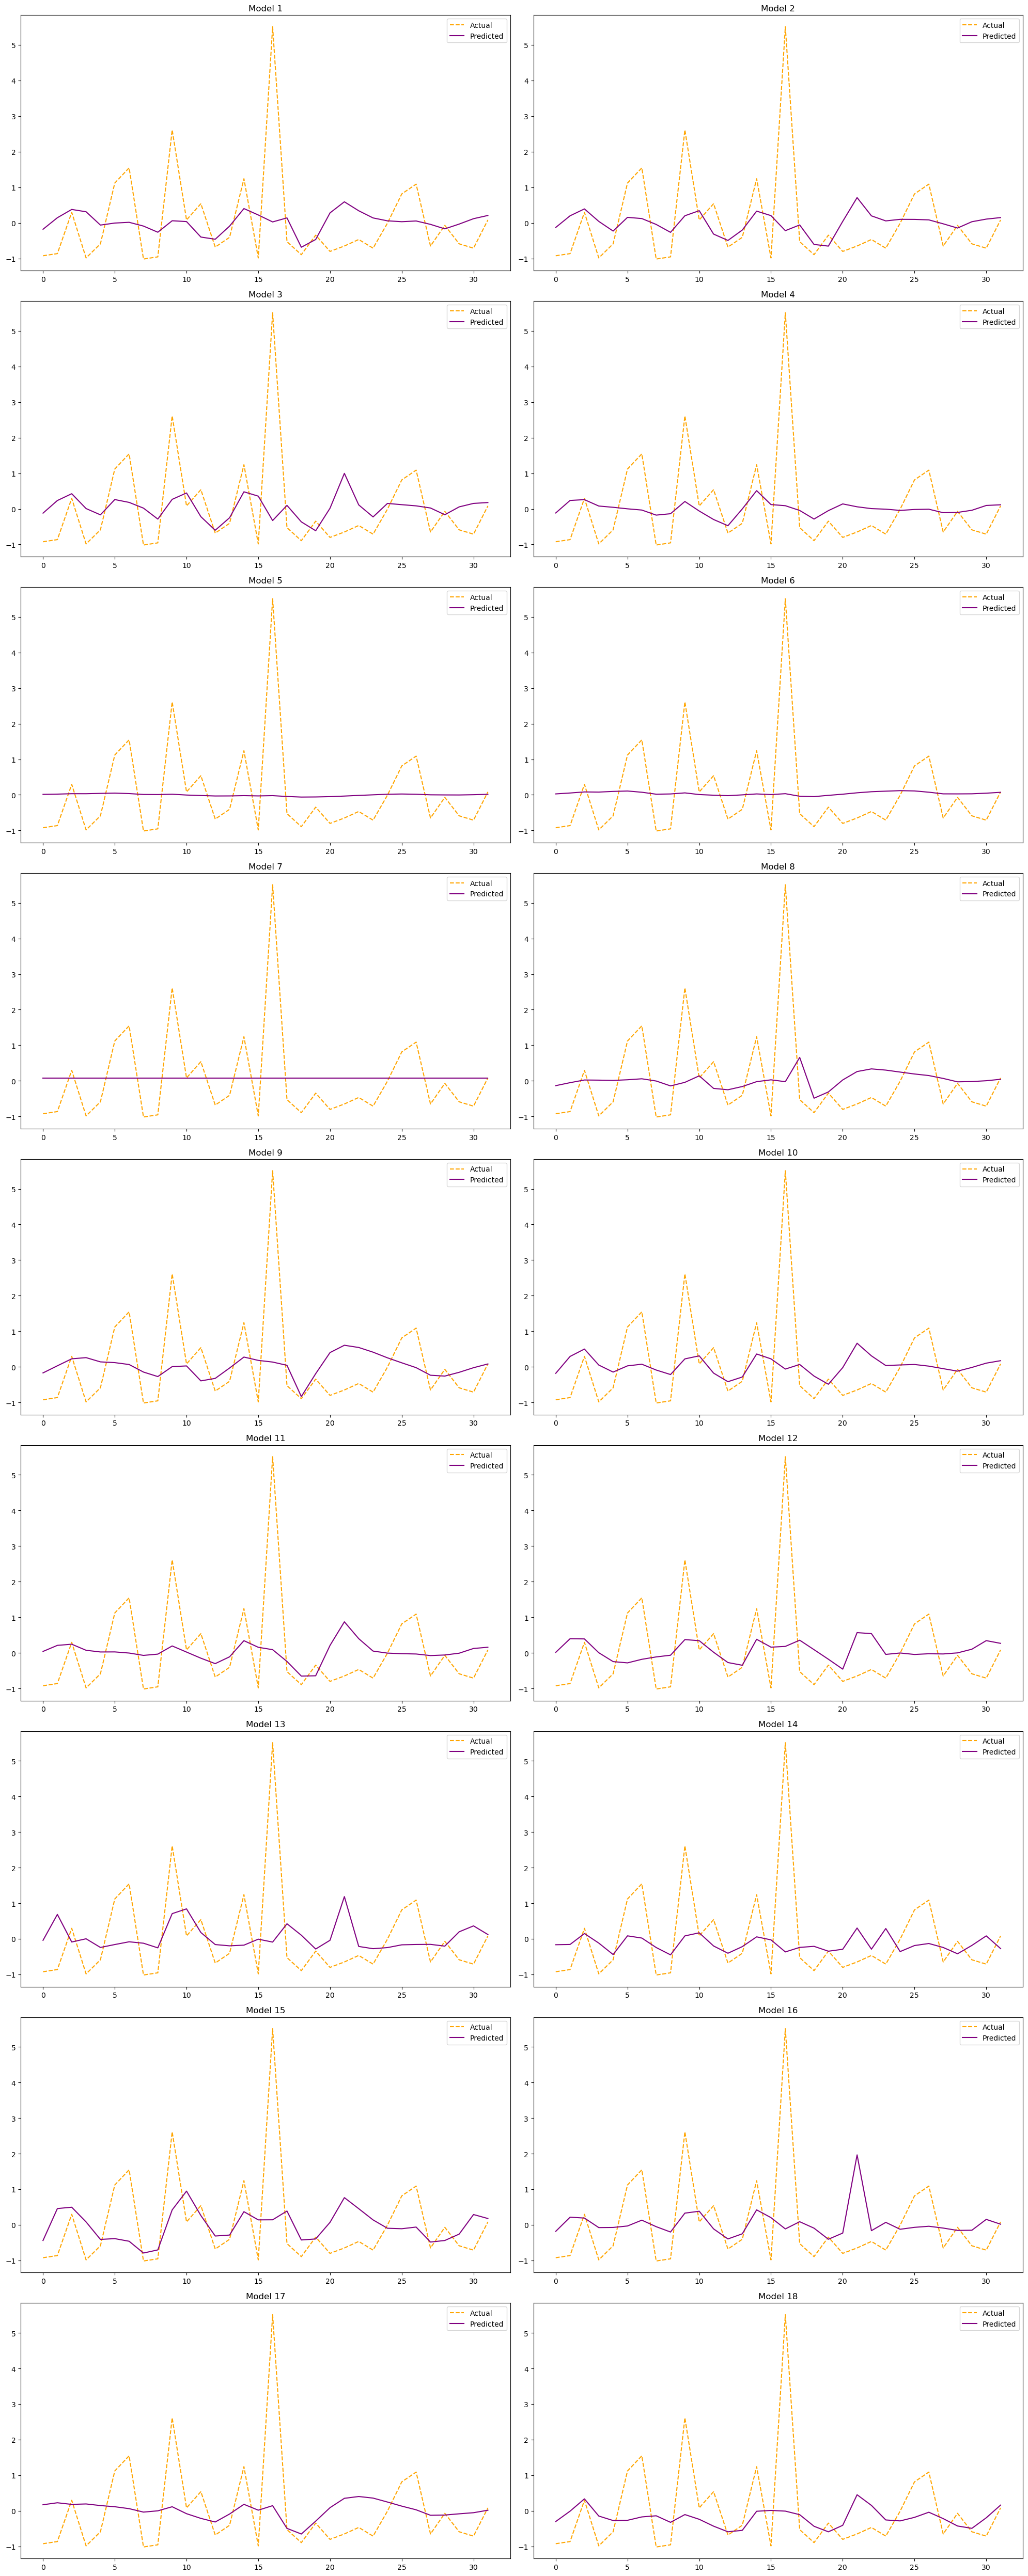

In [410]:
model_predictions = [train_predictions_model1, train_predictions_model2, train_predictions_model3, train_predictions_model4, train_predictions_model5, train_predictions_model6, train_predictions_model7, train_predictions_model8, train_predictions_model9, train_predictions_model10, train_predictions_model11, train_predictions_model12, train_predictions_model13, train_predictions_model14, train_predictions_model15, train_predictions_model16, train_predictions_model17, train_predictions_model18, train_predictions_dense]
actual_values = targets_val
fig, axes = plt.subplots(9, 2, figsize=(20, 50))

for i, ax in enumerate(axes.flatten()):
    if i < len(model_predictions):
        # Plot the actual values first for visibility
        ax.plot(actual_values, label='Actual', color='orange', linestyle='--')

        # Plot each model's prediction
        ax.plot(model_predictions[i], label='Predicted', color="purple")

        ax.set_title(f'Model {i+1}')
        ax.legend()
    else:
        ax.set_visible(False)  # Hide unused subplots


plt.tight_layout()
plt.show()

<h4> Identification of optimal epochs from loss and validation plots </h4> 

The best model I chose was Model 9, because the lines overlap between 15 and 20, which is a sign that the the predictions are starting to predict the exact true data. The error is also almost the same, not changing a lot. 

The best epoch was epoch 12, where val_mae was 0.8609

In [411]:
univariate_scaled

array([[ 0.38710946],
       [ 0.08219576],
       [-0.52763166],
       ...,
       [-0.95451085],
       [-0.77156262],
       [ 0.29563535]])

In [412]:
#combine train and val for best model 

train_percentage = 0.8
test_percentage = 0.2
 
split_index_train = int(len(univariate_scaled) * train_percentage)
 

train_data_final = univariate_scaled[:split_index_train]
test_data_final = univariate_scaled[split_index_train:]

In [413]:
train_data_final.shape

(5216, 1)

In [414]:
test_data_final.shape

(1304, 1)

<h4> 3D shaping for new train data 

In [415]:
sequence_length_train_final = 20
batch_size_train_final = 260

generator_train_final = TimeseriesGenerator(train_data_final, train_data_final, length=sequence_length_train_final, batch_size=batch_size_train_final)

In [416]:
inputs_train_final, targets_train_final = generator_train_final[0]

<h4> 3D shaping for new test data 

In [417]:
sequence_length_test_final = 20
batch_size_test_final = 65

generator_test_final = TimeseriesGenerator(test_data_final, test_data_final, length=sequence_length_test_final, batch_size=batch_size_test_final)

In [418]:
inputs_test_final, targets_test_final = generator_test_final[0]

In [419]:
#taking the model fit that generated the initial Model 9 and updating the variables
def model_fitting_final(epochs = 25, batch_size=5, model=model_example):
        history = model.fit(
        inputs_train_final,
        targets_train_final,
        epochs= epochs, batch_size= batch_size, verbose= 1
        )

In [420]:
#call model 
model_9 = model_builder(64) 
model_9.summary()

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_98 (LSTM)              (None, 64)                16896     
                                                                 
 dense_80 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [421]:
#model fit
model_fitting_final(epochs = 12, batch_size=20, model=model_9)

Epoch 1/12
13/13 [==============================] - 2s 10ms/step - loss: 0.8930 - mae: 0.7703
Epoch 2/12
13/13 [==============================] - 0s 8ms/step - loss: 0.8843 - mae: 0.7673
Epoch 3/12
13/13 [==============================] - 0s 8ms/step - loss: 0.8847 - mae: 0.7681
Epoch 4/12
13/13 [==============================] - 0s 9ms/step - loss: 0.8816 - mae: 0.7631
Epoch 5/12
13/13 [==============================] - 0s 8ms/step - loss: 0.8789 - mae: 0.7621
Epoch 6/12
13/13 [==============================] - 0s 9ms/step - loss: 0.8780 - mae: 0.7614
Epoch 7/12
13/13 [==============================] - 0s 7ms/step - loss: 0.8760 - mae: 0.7602
Epoch 8/12
13/13 [==============================] - 0s 8ms/step - loss: 0.8750 - mae: 0.7596
Epoch 9/12
13/13 [==============================] - 0s 8ms/step - loss: 0.8714 - mae: 0.7584
Epoch 10/12
13/13 [==============================] - 0s 8ms/step - loss: 0.8694 - mae: 0.7592
Epoch 11/12
13/13 [==============================] - 0s 9ms/step - l

In [422]:
def plot_builder_final(model=model_example):
    test_predictions_final=model_9.predict(inputs_test_final)
    plt.figure(figsize=(10, 6))
    plt.plot(targets_test_final, label='Actual Values', color='blue')
    plt.plot(test_predictions_final, label='Predicted Values', color='red')
    plt.title('Actual vs Predicted Validation Values')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

3/3 [==============================] - 1s 5ms/step


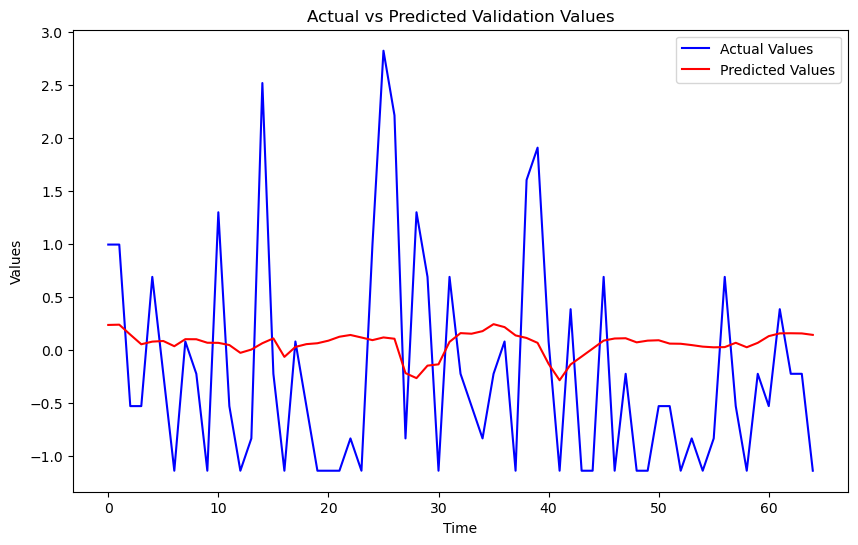

In [423]:
plot_builder_final(model_9)

In [424]:
 test_predictions_final=model_9.predict(inputs_test_final)

3/3 [==============================] - 0s 7ms/step


In [425]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(targets_test_final, test_predictions_final)

In [426]:
mae

0.8873211076457269

<h4> Unscaling and comparison

In [427]:
targets_unscale = scaler.inverse_transform(targets_test_final)
print("Original data:\n", targets_unscale)

Original data:
 [[3.3]
 [3.3]
 [2.8]
 [2.8]
 [3.2]
 [2.9]
 [2.6]
 [3. ]
 [2.9]
 [2.6]
 [3.4]
 [2.8]
 [2.6]
 [2.7]
 [3.8]
 [2.9]
 [2.6]
 [3. ]
 [2.8]
 [2.6]
 [2.6]
 [2.6]
 [2.7]
 [2.6]
 [3.3]
 [3.9]
 [3.7]
 [2.7]
 [3.4]
 [3.2]
 [2.6]
 [3.2]
 [2.9]
 [2.8]
 [2.7]
 [2.9]
 [3. ]
 [2.6]
 [3.5]
 [3.6]
 [3. ]
 [2.6]
 [3.1]
 [2.6]
 [2.6]
 [3.2]
 [2.6]
 [2.9]
 [2.6]
 [2.6]
 [2.8]
 [2.8]
 [2.6]
 [2.7]
 [2.6]
 [2.7]
 [3.2]
 [2.8]
 [2.6]
 [2.9]
 [2.8]
 [3.1]
 [2.9]
 [2.9]
 [2.6]]


In [428]:
test_unscale = scaler.inverse_transform(test_predictions_final)
print("Predictions data:\n", test_unscale)

Predictions data:
 [[3.0512207]
 [3.0520601]
 [3.0212986]
 [2.991403 ]
 [2.9995966]
 [3.0015683]
 [2.9853947]
 [3.007144 ]
 [3.0069363]
 [2.9961414]
 [2.9958253]
 [2.9890268]
 [2.9648864]
 [2.975089 ]
 [2.9946868]
 [3.0096302]
 [2.9523876]
 [2.9831932]
 [2.9917915]
 [2.9945722]
 [3.00256  ]
 [3.01475  ]
 [3.0201647]
 [3.0123389]
 [3.004213 ]
 [3.012529 ]
 [3.0085125]
 [2.9020858]
 [2.8865917]
 [2.9252865]
 [2.9292946]
 [2.9987693]
 [3.0259166]
 [3.024034 ]
 [3.0320446]
 [3.0536187]
 [3.044509 ]
 [3.0188117]
 [3.0109067]
 [2.9957366]
 [2.9307616]
 [2.8800604]
 [2.9288905]
 [2.9533021]
 [2.9779418]
 [3.002736 ]
 [3.0092633]
 [3.0100467]
 [2.9973283]
 [3.0026422]
 [3.0038314]
 [2.9934504]
 [2.9929776]
 [2.9888847]
 [2.9840977]
 [2.9819593]
 [2.9825885]
 [2.9959757]
 [2.9821367]
 [2.9958498]
 [3.0165937]
 [3.0251389]
 [3.0254955]
 [3.0250084]
 [3.0204718]]


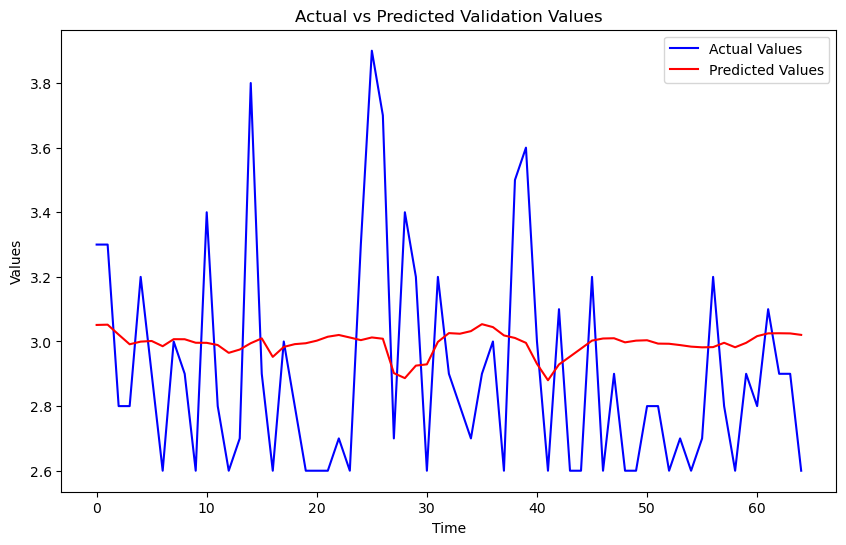

In [429]:
plt.figure(figsize=(10, 6))
plt.plot(targets_unscale, label='Actual Values', color='blue')
plt.plot(test_unscale, label='Predicted Values', color='red')
plt.title('Actual vs Predicted Validation Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

-------------------

<h3> Analysis and conclusion

I chose Model 9 as the best running model due to a low val_mae, but mostly due to the predicted line that almost overlaps over the actual data. I identified the best epoch as being epoch 12 with a val_mae of 0.86. 

In order to be able to run the best model's architecture, I needed new data, so I combined the original train and validation sets and reshaped them from 2D to a 3D shape. The new model stopped at 12 epochs. The overall predicted line does not look incredibly curved over the actual data, but there is a slight pattern, which tells me that the model is good. However, as with most models, more time is needed in order to fine tune the hyperparameters. So far, it is a good start to a good predicition model for earthquake magnitude. 

The final step is to unscale the data and see how the predictions are matching the actual data, without being normalised. Almost the same as the best running model, the prediction line almost follows the pattern of the real data, but as mentioned above, more time would be needed for fine tuning. 

This report looked at the importance of predicting earthquakes and more specifically their magnitude, given the new increase in earthquakes and their aftershocks. Looking forward to further research, it would be useful to be able to create a model that takes in geospatial data and other natural disaster factors and is able to predict earthquakes magnitudes. 

<h3> References

Mikedelong (2024) Earthquake maps, Kaggle. Available at: https://www.kaggle.com/code/mikedelong/earthquake-maps (Accessed: 15 January 2024).

Regan, H. (2024) ‘battle against time’ to find quake survivors as Japan lifts tsunami warnings and death toll rises, CNN. Available at: https://edition.cnn.com/2024/01/02/asia/japan-earthquake-tsunami-warnings-tuesday-intl-hnk/index.html (Accessed: 15 January 2024). 

Anticipatory action (no date a) UN OCHA. Available at: https://www.unocha.org/anticipatory-action#:~:text=Anticipatory%20action%20is%20now%20commonly,impacts%20before%20they%20fully%20unfold. (Accessed: 15 January 2024). 

Brownlee, J. (2019) How to scale data for long short-term memory networks in python, MachineLearningMastery.com. Available at: https://machinelearningmastery.com/how-to-scale-data-for-long-short-term-memory-networks-in-python/ (Accessed: 15 January 2024). 

Dynamic optimization (no date) LSTM Networks. Available at: https://apmonitor.com/do/index.php/Main/LSTMNetwork#:~:text=Data%20preparation%20for%20LSTM%20networks,division%20for%20training%20and%20validation (Accessed: 15 January 2024). 

Gustavovacilotto (2024) Earthquake Heatmap, Kaggle. Available at: https://www.kaggle.com/code/gustavovacilotto/earthquake-heatmap (Accessed: 15 January 2024). 

Keser, M. (2023) Earthquakes 2023 global, Kaggle. Available at: https://www.kaggle.com/datasets/mustafakeser4/earthquakes-2023-global/data (Accessed: 15 January 2024). 

Mean absolute error (2022) C3 AI. Available at: https://c3.ai/glossary/data-science/mean-absolute-error/#:~:text=Why%20is%20Mean%20Absolute%20Error,of%20errors%20for%20regression%20problems. (Accessed: 15 January 2024). 

Saxena, S. (2024a) What is LSTM? introduction to long short-term memory, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/03/introduction-to-long-short-term-memory-lstm/#LSTM_Architecture (Accessed: 15 January 2024). 

Seismic magnitude scales (2023) Wikipedia. Available at: https://en.wikipedia.org/wiki/Seismic_magnitude_scales#%22Richter%22_magnitude_scale (Accessed: 15 January 2024). 

Summary information on the 2024 Noto Peninsula earthquake (Japan), 4 Jan 2024 - Japan (2024) ReliefWeb. Available at: https://reliefweb.int/report/japan/summary-information-2024-noto-peninsula-earthquake-japan-4-jan-2024 (Accessed: 15 January 2024). 

What is normalization in data mining and how to do it? (no date) upGrad blog. Available at: https://www.upgrad.com/blog/normalization-in-data-mining/ (Accessed: 15 January 2024). 